In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', 1500)  
pd.set_option('display.max_columns', 1500)

In [3]:
df = pd.read_csv("House Prediction.csv")

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
df.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [9]:
print(df['MSSubClass'].value_counts())

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64


## Handling Missing Values

In [10]:
print(df['LotFrontage'].value_counts())

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [11]:
df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1162  1163          20       RL        109.0     8724   Pave   NaN      Reg   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
867    868          20       RL         85.0     6970   Pave   NaN      Reg   
182    183          20       RL         60.0     9060   Pave   NaN      Reg   
934    935          20       RL        313.0    27650   Pave   NaN      IR2   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1162         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
867          Lvl    AllPub    Corner       Gtl       Sawyer      Feedr   
182          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
934          HLS    AllPub    Inside       Mod        NAmes       PosA   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1162       Norm     1Fam     1Story            5            5       1968   
13         Norm     1Fam     1Story            7            5       2006   
867        Norm     1Fam     1Story            4            5       1961   
182        Norm     1Fam     1Story            5            6       1957   
934        Norm     1Fam     1Story            7            7       1960   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1162          1968     Gable  CompShg     VinylSd     VinylSd        NaN   
13            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
867           1961     Gable  CompShg     VinylSd     VinylSd        NaN   
182           2006       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
934           2007      Flat  Tar&Grv     Wd Sdng     Wd Sdng        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1162         0.0        TA        TA     CBlock       Gd       TA   
13         306.0        Gd        TA      PConc       Gd       TA   
867          0.0        TA        TA     CBlock       TA       TA   
182         98.0        TA        TA      PConc      NaN      NaN   
934          0.0        TA        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1162           No          BLQ         492          Unf           0   
13             Av          Unf           0          Unf           0   
867            No          ALQ         932          Unf           0   
182           NaN          NaN           0          NaN           0   
934            Gd          GLQ         425          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1162        402          894    GasA        Gd          Y      SBrkr   
13         1494         1494    GasA        Ex          Y      SBrkr   
867         108         1040    GasA        TA          Y      SBrkr   
182           0            0    GasA        Ex          Y      SBrkr   
934         160          585    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1162       894         0             0        894             0             0   
13        1494         0             0       1494             0             0   
867       1120         0             0       1120             1             0   
182       1340         0             0       1340             0             0   
934       2069         0             0       2069             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1162         1         0             3             1          TA   
13           2         0             3             1          Gd   
867          1         1             3             1          Fa   
182          1         0             3             1          TA   
934          2         0             4             1          Gd   

   

<Axes: xlabel='LotFrontage', ylabel='Density'>

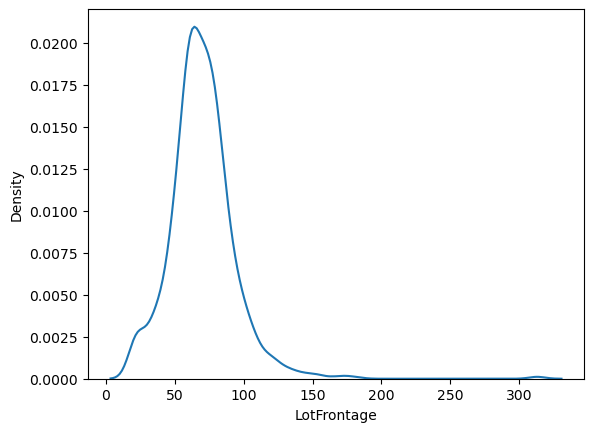

In [12]:
sns.kdeplot(df['LotFrontage'])

In [13]:
# Impute missing values with mode
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])

In [14]:
df['LotFrontage'].isnull().mean()*100

0.0

In [15]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [16]:
df['Alley']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21      Grvl
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30      Pave
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52       NaN
53       NaN
54       NaN
55       NaN
56      Pave
57       NaN
58       NaN
59       NaN
60       NaN
61       NaN
62       NaN
63       NaN
64       NaN
65       NaN
66       NaN
67       NaN
68       NaN
69       NaN
70       NaN
71       NaN
72       NaN
73       NaN
74       NaN
75       NaN
76       NaN

In [17]:
# Replace missing values with 'NoAllay'
df['Alley']=df['Alley'].fillna('NoAlley')

In [18]:
df['Alley'].isnull().sum()

0

In [19]:
df['Alley'].value_counts()

Alley
NoAlley    1369
Grvl         50
Pave         41
Name: count, dtype: int64

<Axes: xlabel='Alley', ylabel='count'>

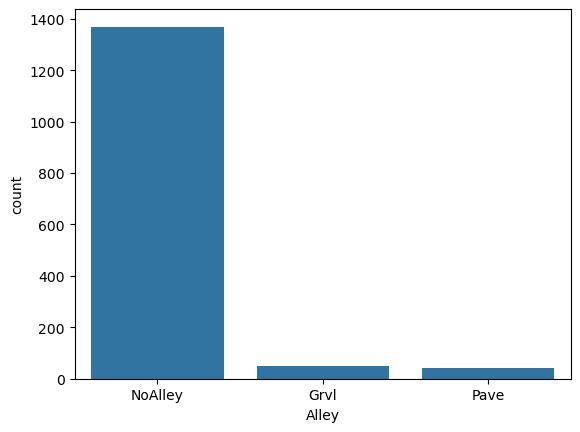

In [20]:
sns.countplot(data=df,x='Alley')

In [21]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [22]:
df['MasVnrType']=df['MasVnrType'].fillna('NoType')

In [23]:
df['MasVnrType'].value_counts()

MasVnrType
NoType     872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

<Axes: xlabel='MasVnrType', ylabel='count'>

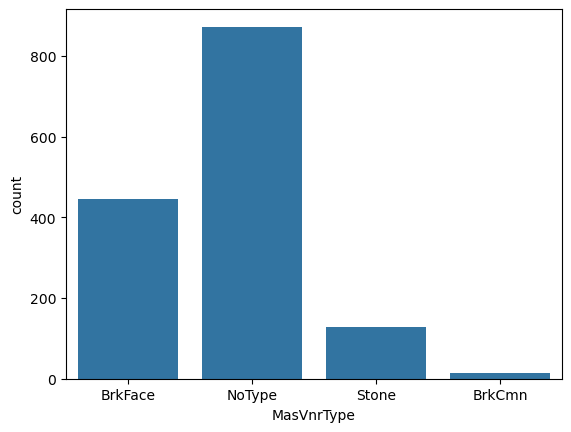

In [24]:
sns.countplot(data=df,x='MasVnrType')

In [25]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0    

In [26]:
df['MasVnrArea'].isnull().sum()

8

In [27]:
df.dropna(subset=['MasVnrArea'],inplace=True)

In [28]:
df['MasVnrArea'].isnull().sum()

0

In [29]:
df['BsmtQual'].value_counts()

BsmtQual
TA    648
Gd    612
Ex    120
Fa     35
Name: count, dtype: int64

In [30]:
df['BsmtQual'].isnull().sum()

37

In [31]:
df['BsmtQual']=df['BsmtQual'].fillna('NA')

In [32]:
df['BsmtQual'].isnull().sum()

0

In [33]:
df['BsmtCond'].value_counts()

BsmtCond
TA    1304
Gd      64
Fa      45
Po       2
Name: count, dtype: int64

In [34]:
df['BsmtCond'].isnull().sum()

37

In [35]:
df['BsmtCond']=df['BsmtCond'].fillna('NA')

In [36]:
df['BsmtCond'].isnull().sum()

0

<Axes: xlabel='BsmtCond', ylabel='count'>

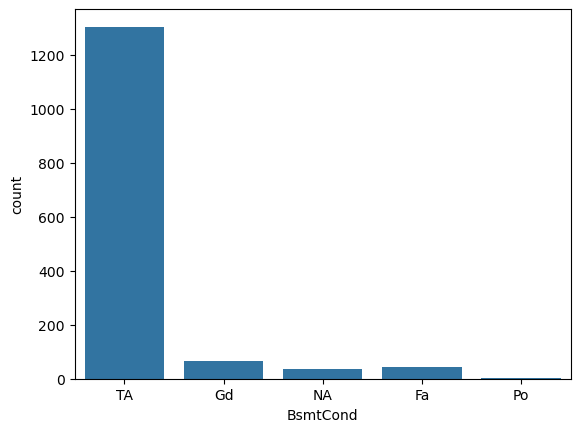

In [37]:
sns.countplot(data=df,x='BsmtCond')

In [38]:
df['Electrical'].value_counts()

Electrical
SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [39]:
df['Electrical'].isnull().sum()

1

In [40]:
df.dropna(subset=['Electrical'],inplace=True) 

In [41]:
df['Electrical'].isnull().sum()

0

In [42]:
df['Fireplaces'].value_counts()

Fireplaces
0    685
1    648
2    113
3      5
Name: count, dtype: int64

In [43]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    378
TA    311
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [44]:
df['FireplaceQu'].isnull().sum()

685

In [45]:
df['FireplaceQu']=df['FireplaceQu'].fillna('NO')

In [46]:
df['FireplaceQu'].isnull().sum()

0

<Axes: xlabel='FireplaceQu', ylabel='count'>

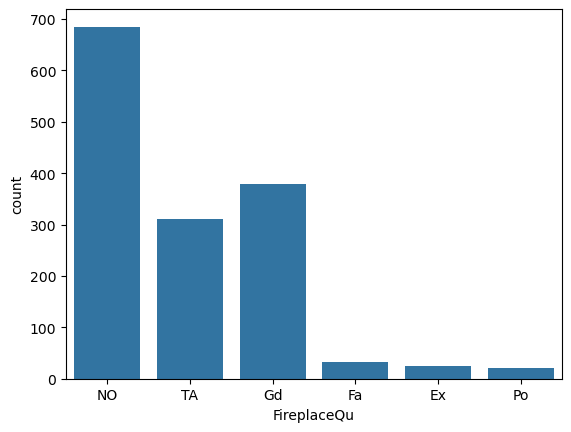

In [47]:
sns.countplot(data=df,x='FireplaceQu')

In [48]:
df['GarageType'].value_counts()

GarageType
Attchd     863
Detchd     387
BuiltIn     86
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [49]:
df['GarageType'].isnull().sum()

81

In [50]:
df['GarageType']=df['GarageType'].fillna('NO')

In [51]:
df['GarageType'].isnull().sum()

0

In [52]:
df['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    65
2006.0    58
2004.0    53
2003.0    49
2007.0    45
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
1950.0    24
2002.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1957.0    20
2001.0    20
1996.0    20
1997.0    19
1978.0    19
1960.0    19
1954.0    19
1964.0    18
1995.0    18
1994.0    18
1974.0    18
1959.0    17
1956.0    16
1990.0    16
1963.0    16
1967.0    15
1979.0    15
1980.0    15
1969.0    15
1940.0    14
1973.0    14
1972.0    14
1988.0    14
1920.0    14
1955.0    13
1961.0    13
1971.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1989.0    10
1925.0    10
1981.0    10
1985.0    10
1941.0    10
1939.0     9
1991.0     9
1949.0     8
1975.0     8
1930.0     8
1984.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1916.0     5
1922.0     5
1936.0     5
1945.0     4
1946.0     4
1928.0     4
1935.0     4
1982.0     4
1931.0     4


In [53]:
df['GarageYrBlt'].dtype

dtype('float64')

In [54]:
df['GarageYrBlt'].isnull().sum()

81

In [55]:
df.drop(columns=['GarageYrBlt'], inplace=True)

In [56]:
df['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    418
Fin    347
Name: count, dtype: int64

In [57]:
df['GarageFinish'].isnull().sum()

81

In [58]:
df['GarageFinish']=df['GarageFinish'].fillna('NO')

In [59]:
df['GarageFinish'].isnull().sum()

0

In [60]:
df.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage       0.000000
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      2.618884
BsmtFinType1      2.549966
BsmtFinSF1        0.000000
BsmtFinType2      2.618884
BsmtFinSF2        0.000000
B

In [61]:
df['BsmtExposure'].value_counts()

BsmtExposure
No    945
Av    221
Gd    133
Mn    114
Name: count, dtype: int64

In [62]:
df['BsmtExposure'].isnull().sum()

38

In [63]:
df['BsmtExposure']=df['BsmtExposure'].fillna('NOB')

In [64]:
df['BsmtExposure'].isnull().sum()

0

<Axes: xlabel='BsmtExposure', ylabel='count'>

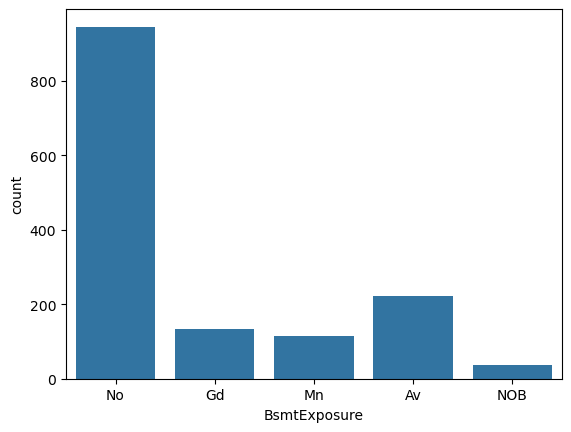

In [65]:
sns.countplot(data=df,x='BsmtExposure')

In [66]:
df['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    427
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
Name: count, dtype: int64

In [67]:
df['BsmtFinType1'].isnull().sum()

37

In [68]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NO')

In [69]:
df['BsmtFinType1'].isnull().sum()

0

<Axes: xlabel='BsmtFinType1', ylabel='count'>

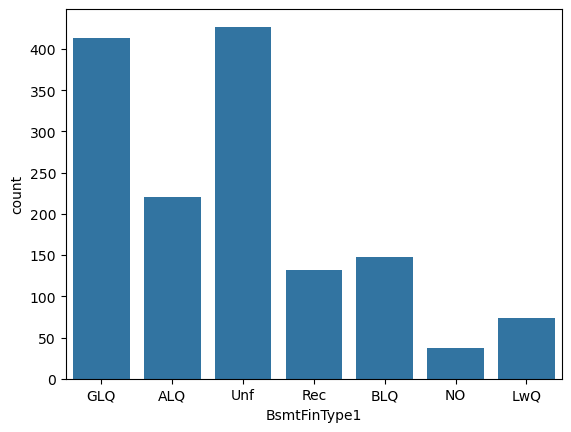

In [70]:
sns.countplot(data=df,x='BsmtFinType1')

In [71]:
df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1247
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [72]:
df['BsmtFinType2'].isnull().sum()

38

In [73]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NO')

In [74]:
df['BsmtFinType2'].isnull().sum()

0

<Axes: xlabel='BsmtFinType2', ylabel='count'>

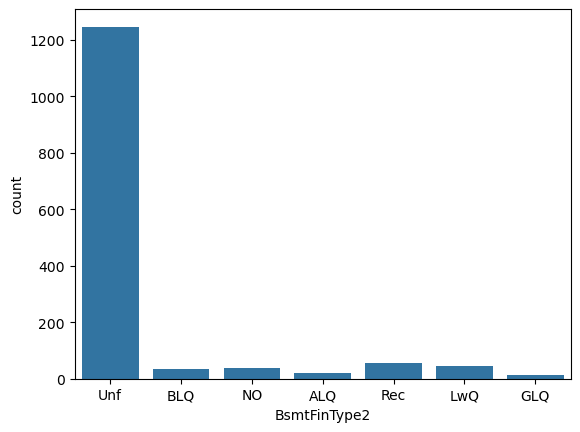

In [75]:
sns.countplot(data=df,x='BsmtFinType2')

In [76]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [77]:
df['PoolQC'].isnull().sum()

1444

In [78]:
df['PoolQC']=df['PoolQC'].fillna('NO')

In [79]:
df['PoolQC'].isnull().sum()

0

<Axes: xlabel='PoolQC', ylabel='count'>

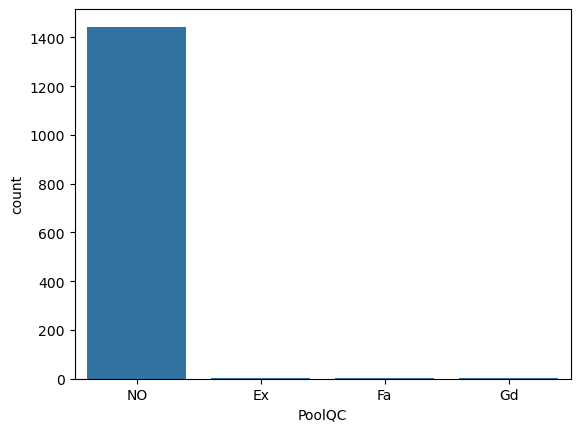

In [80]:
sns.countplot(data=df,x='PoolQC')

In [81]:
df['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [82]:
df['Fence'].isnull().sum()

1170

In [83]:
df['Fence']=df['Fence'].fillna('NO')

In [84]:
df['Fence'].isnull().sum()

0

In [85]:
df['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [86]:
df['MiscFeature'].isnull().sum()

1397

In [87]:
df['MiscFeature']=df['MiscFeature'].fillna('NO')

In [88]:
df['MiscFeature'].isnull().sum()

0

In [89]:
df['GarageQual'].value_counts()

GarageQual
TA    1302
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [90]:
df['GarageQual'].isnull().sum()

81

In [91]:
df['GarageQual']=df['GarageQual'].fillna('NO')

In [92]:
df['GarageQual'].isnull().sum()

0

In [93]:
df['GarageCond'].value_counts()

GarageCond
TA    1317
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [94]:
df['GarageCond'].isnull().sum()

81

In [95]:
df['GarageCond']=df['GarageCond'].fillna('NO')

In [96]:
df['GarageCond'].isnull().sum()

0

In [97]:
df.isnull().mean()*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

In [98]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [99]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Handling Outlier

In [100]:
int_feature=df.select_dtypes(include=["float64","int64"]).columns
print("Total number of integer feature : ", int_feature.shape[0])
print("Integer feature names: ", int_feature)

Total number of integer feature :  37
Integer feature names:  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15720\632600481.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,7))


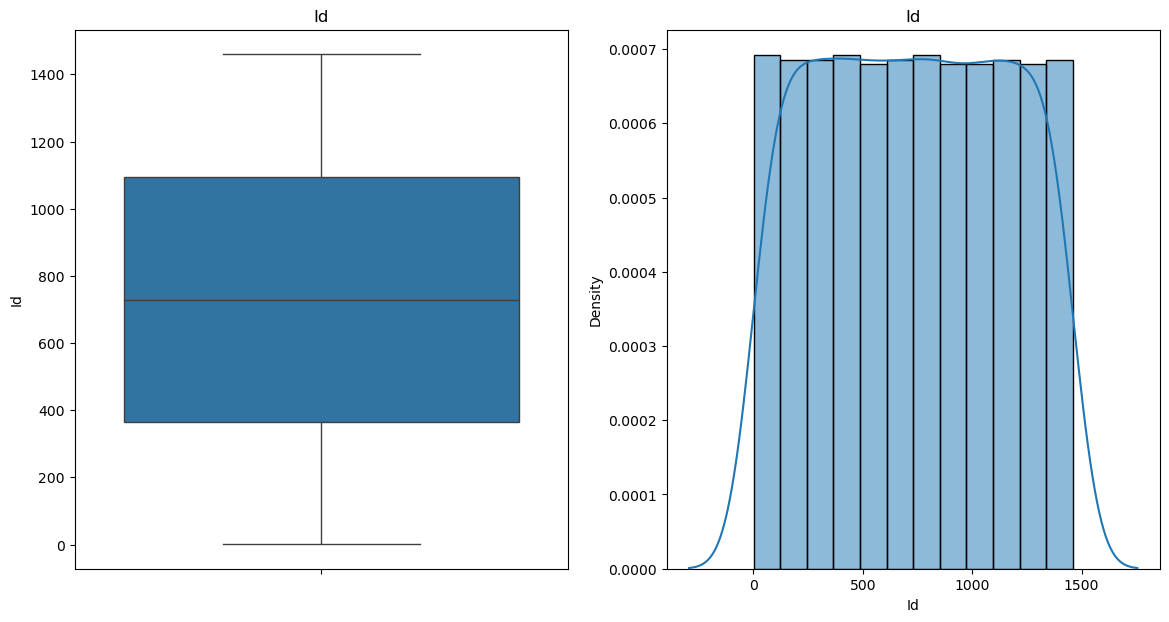

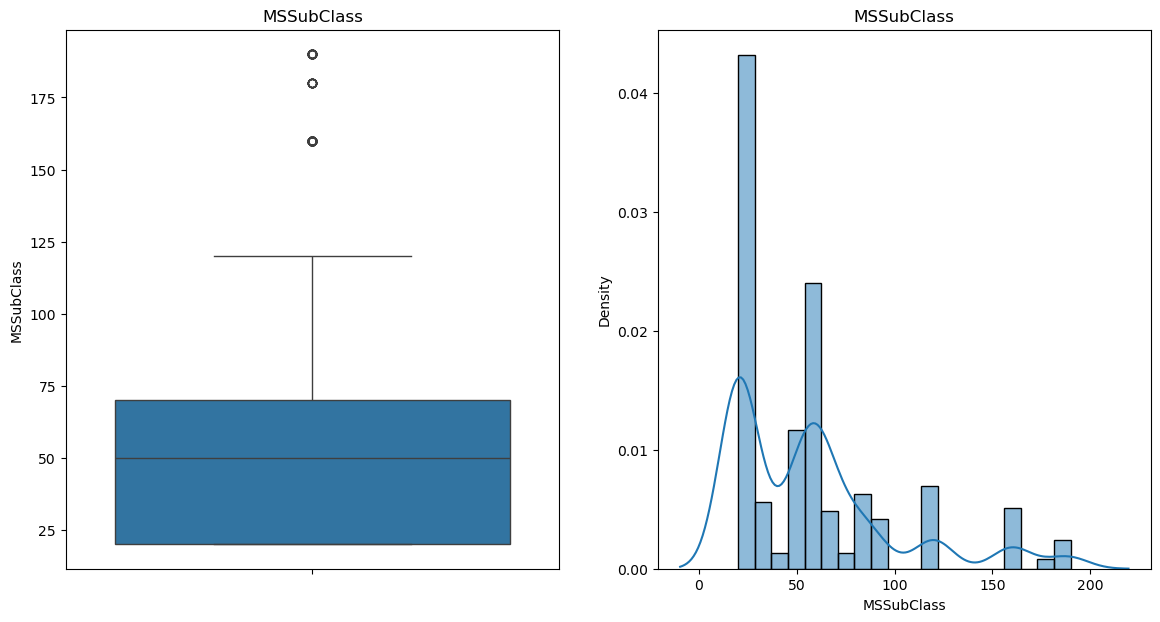

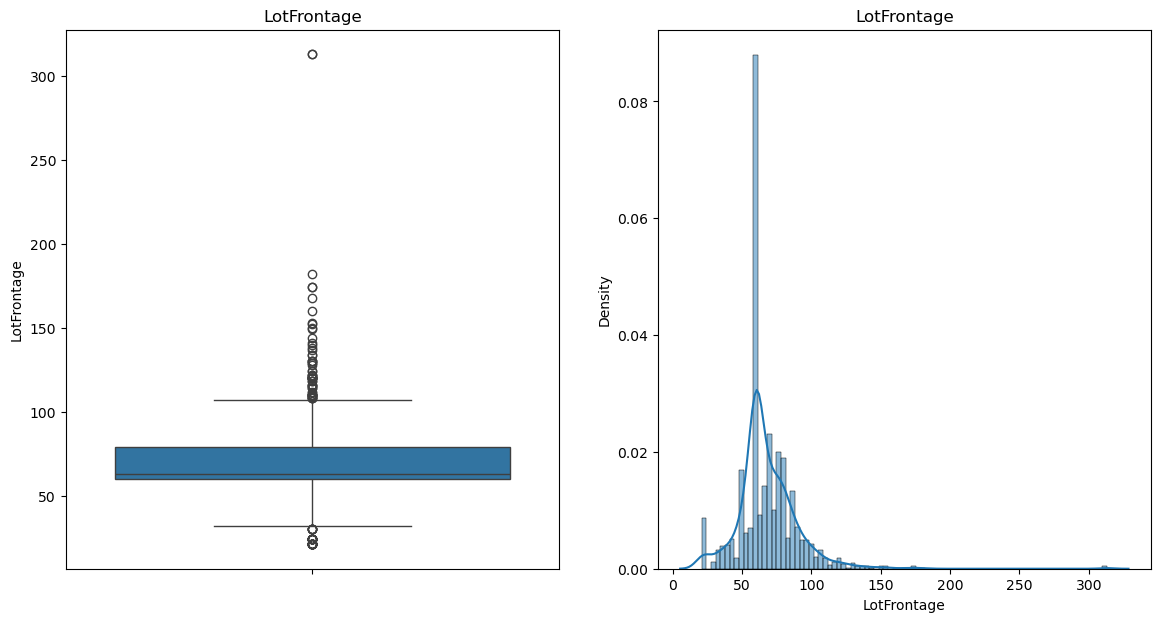

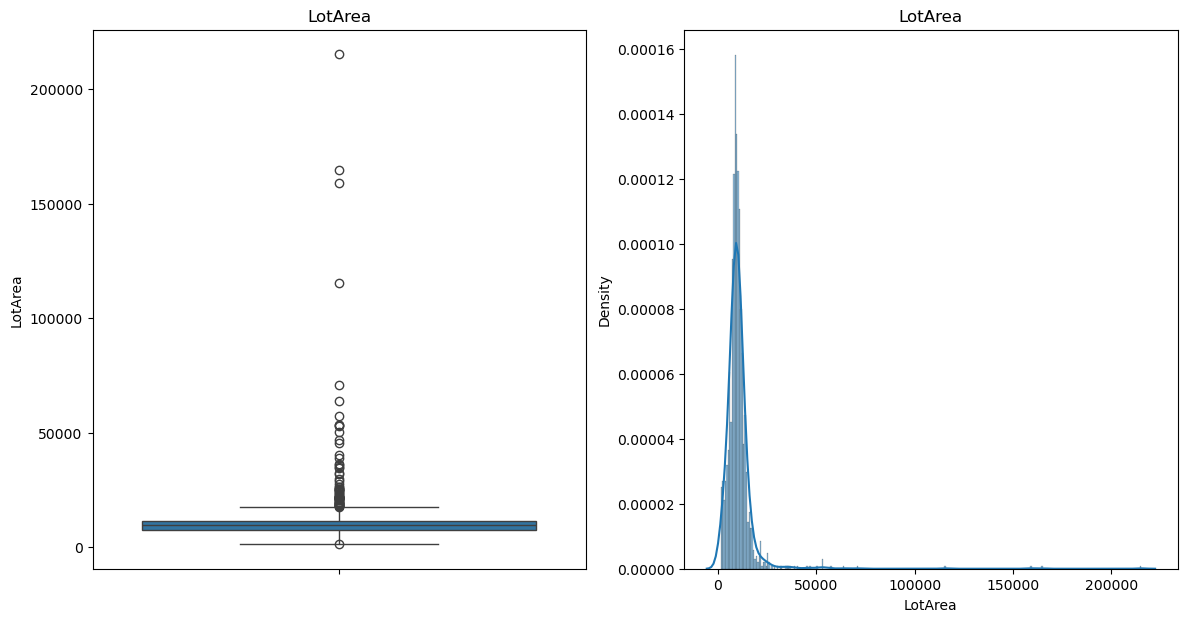

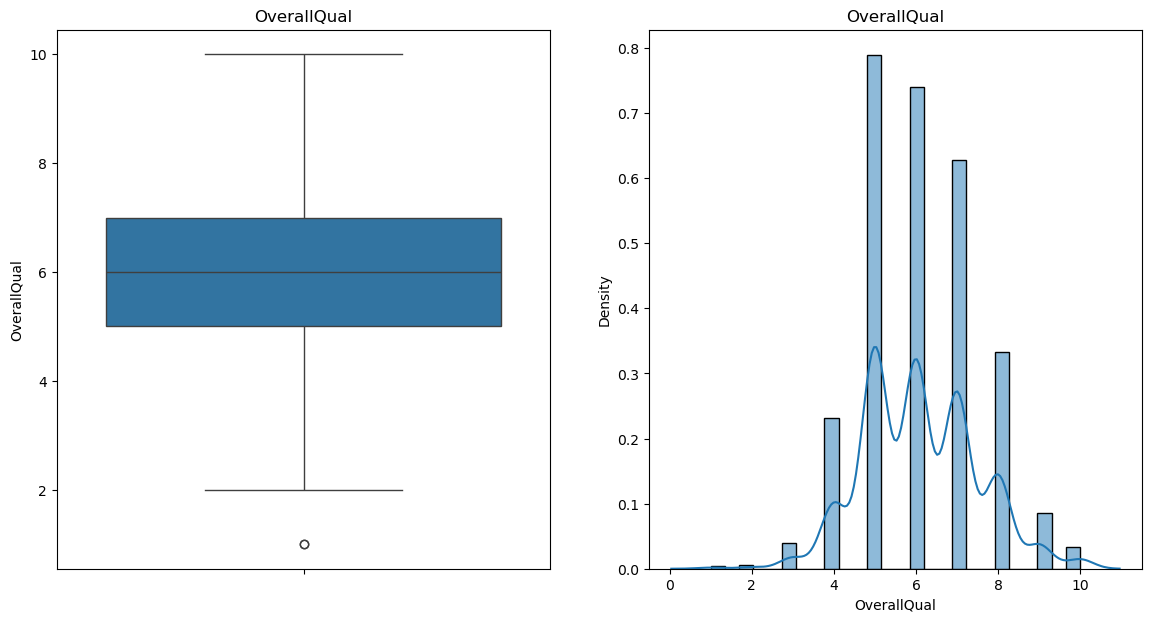

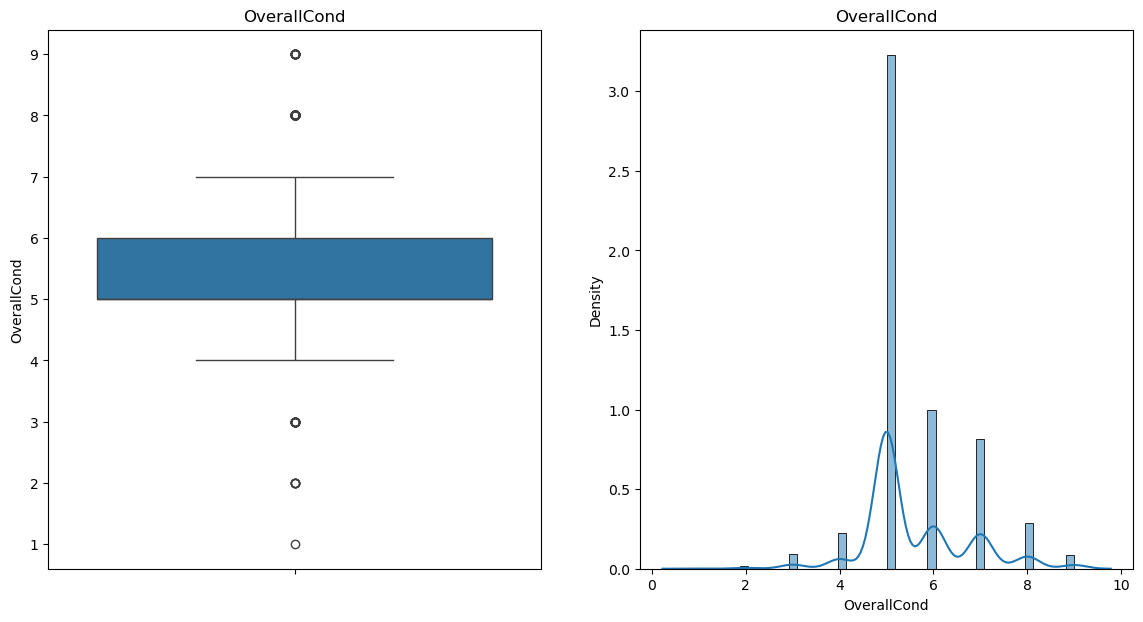

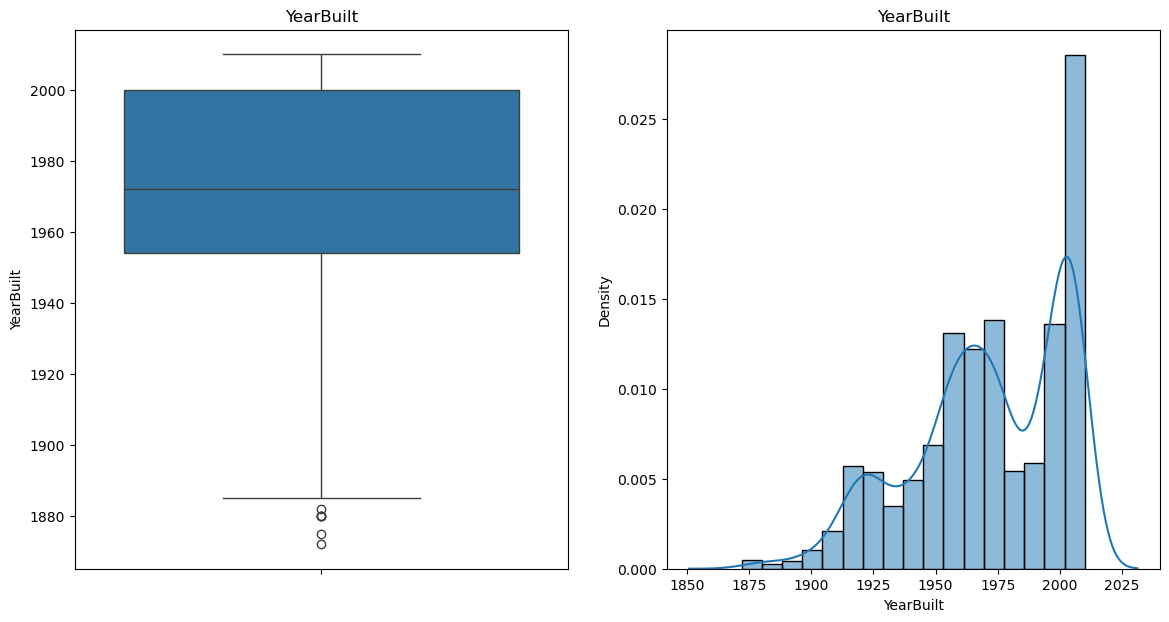

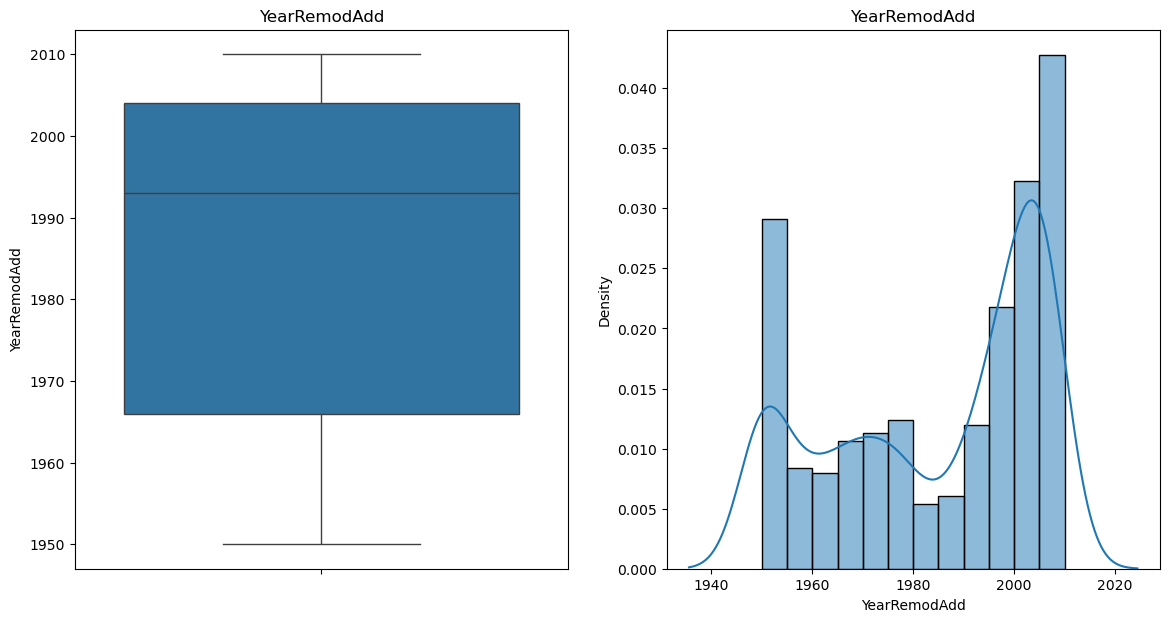

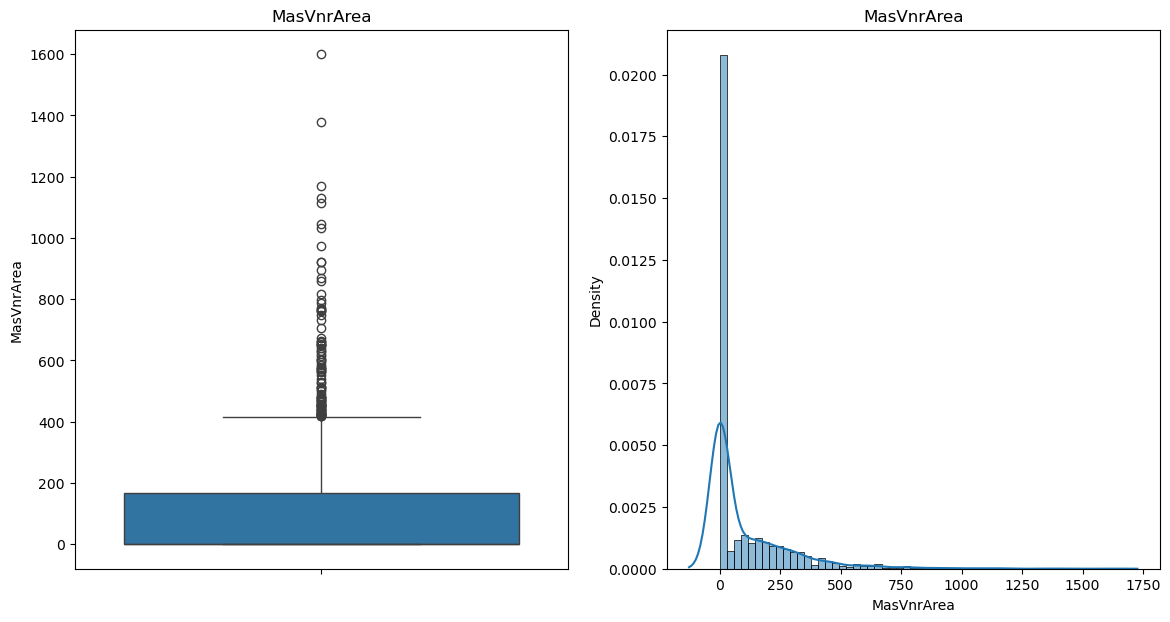

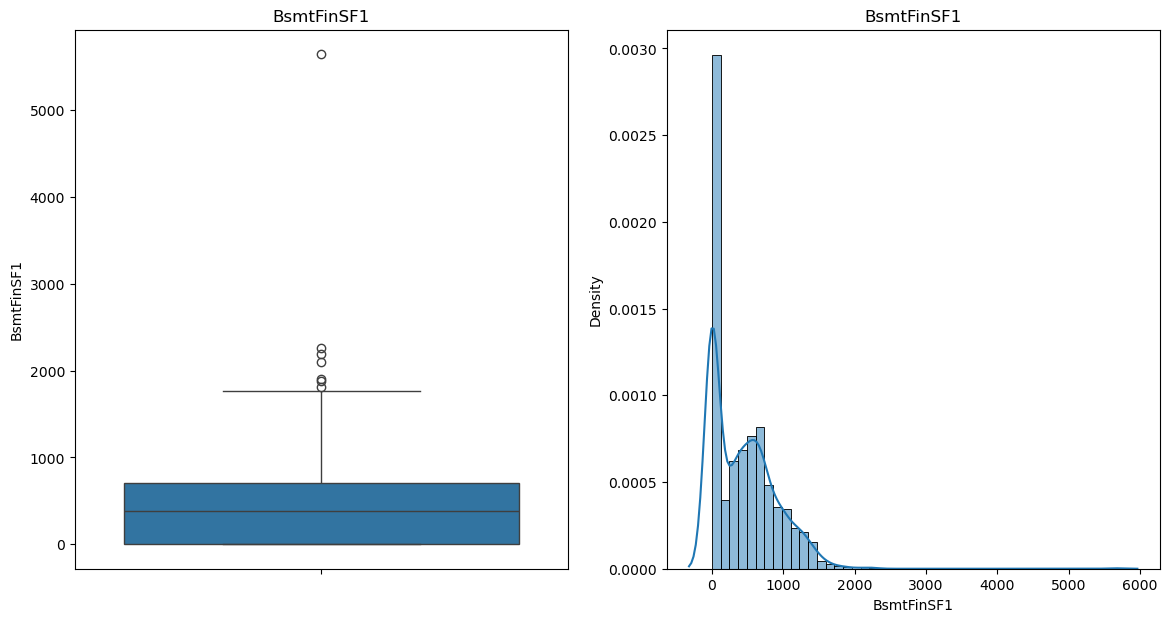

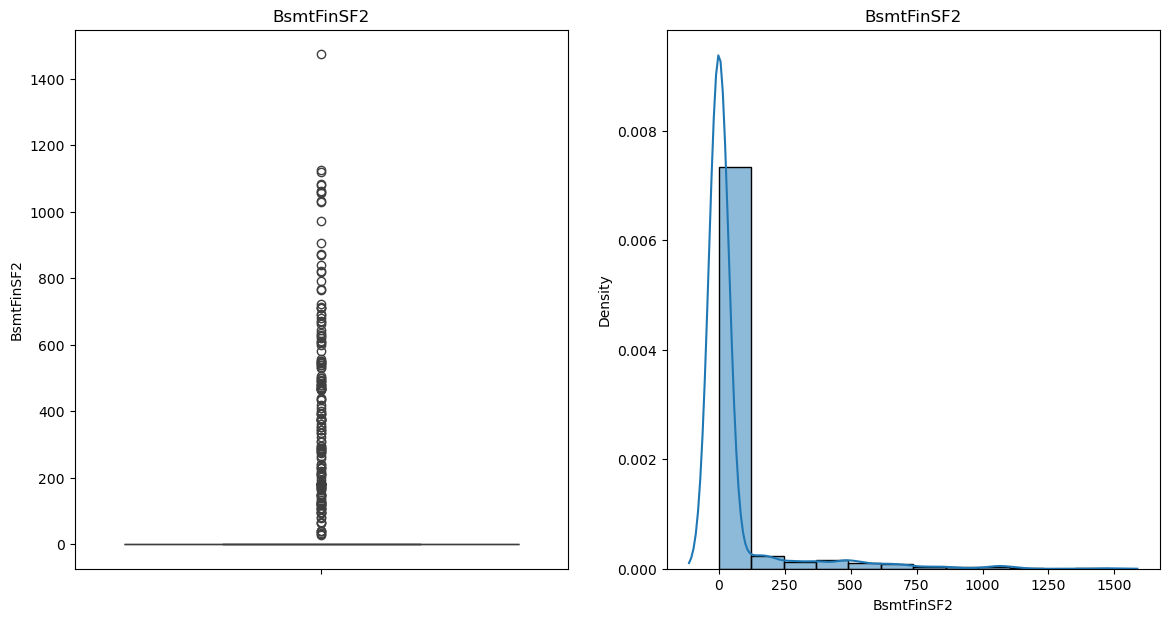

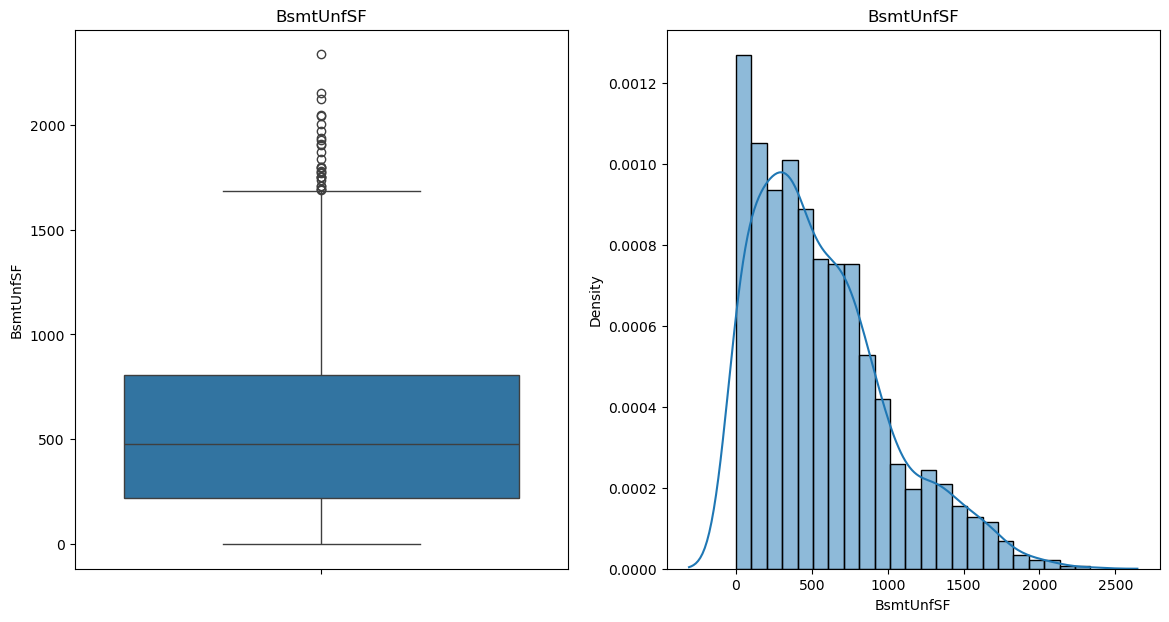

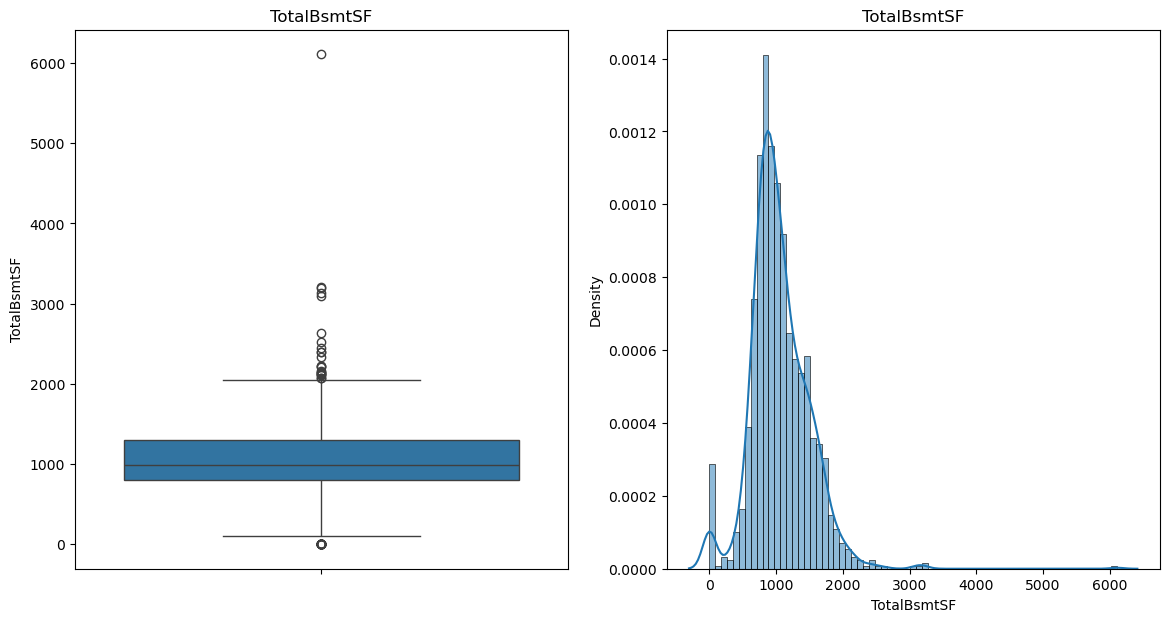

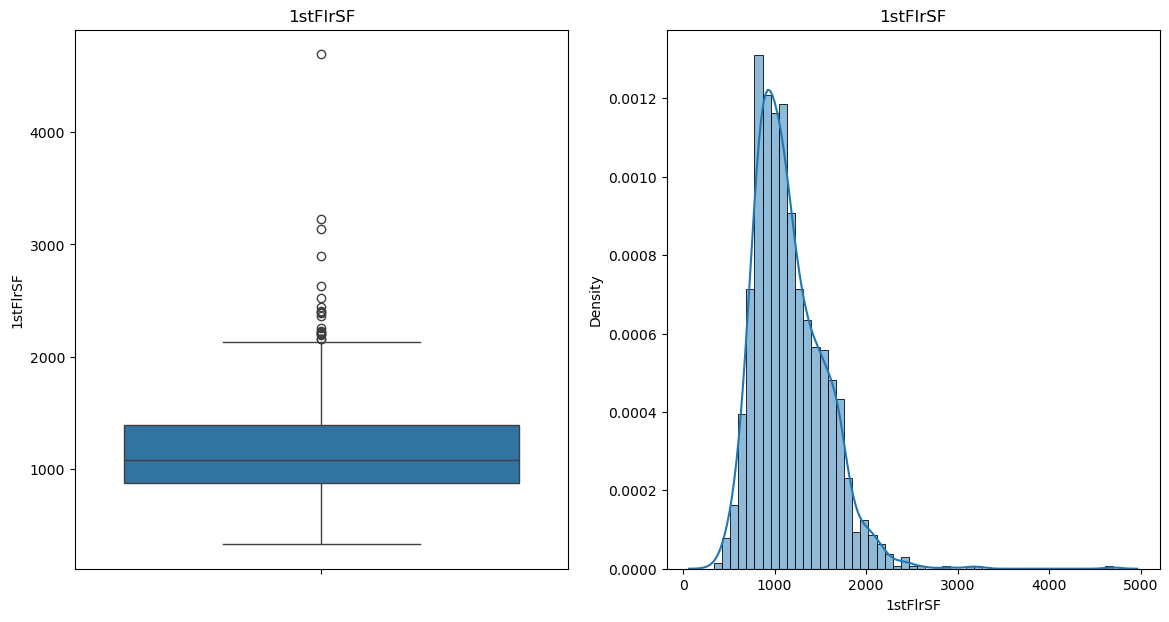

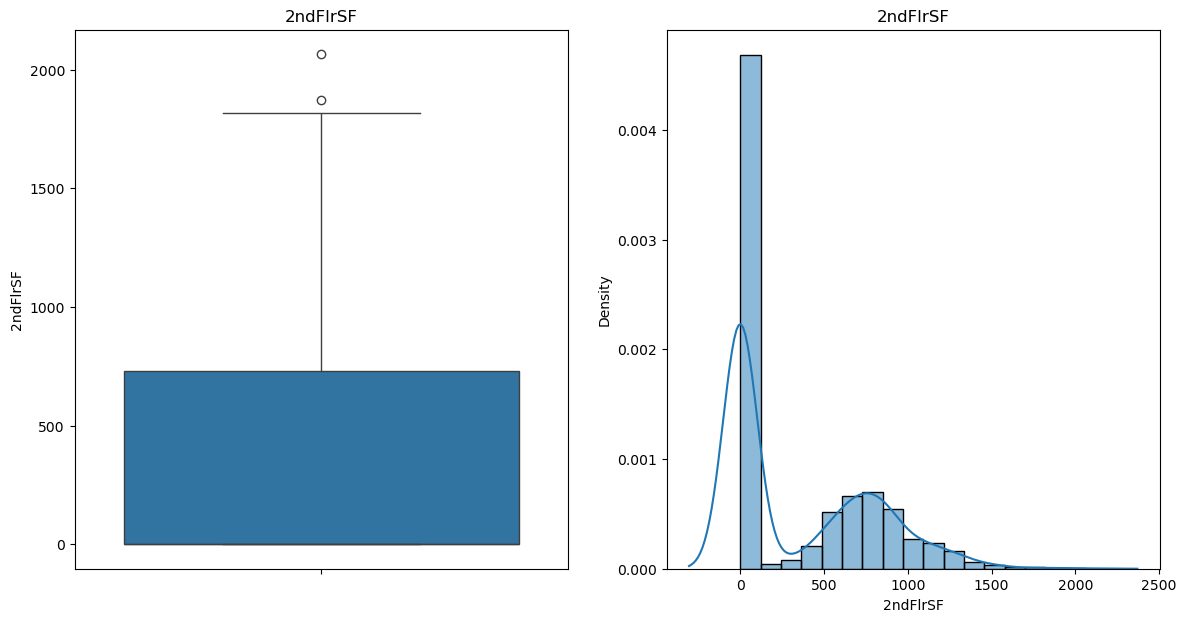

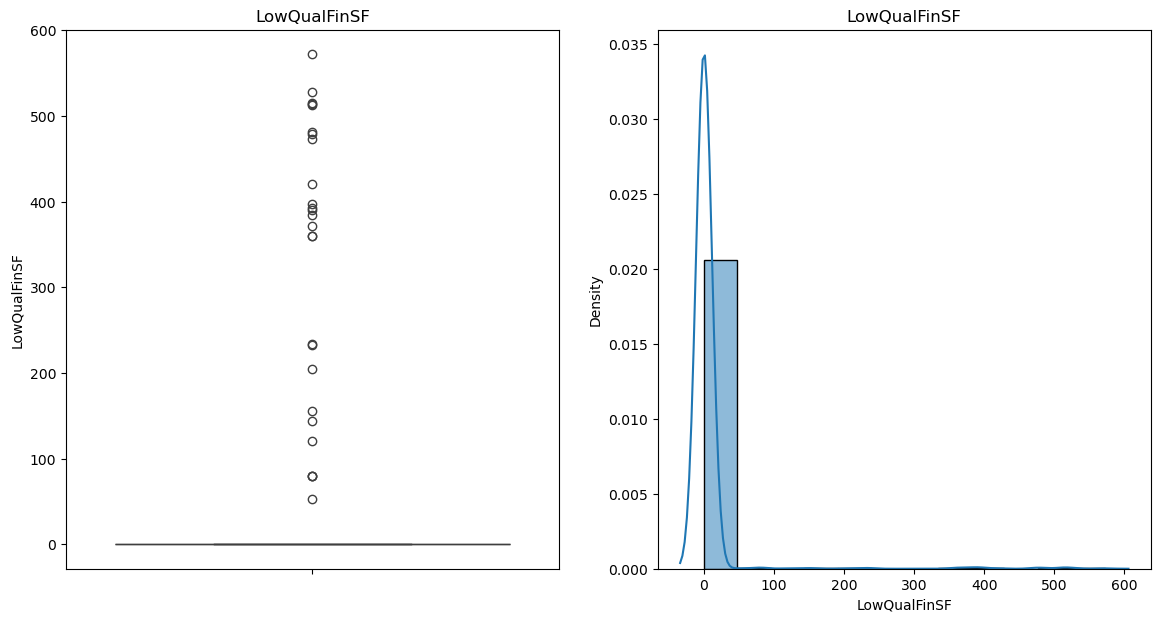

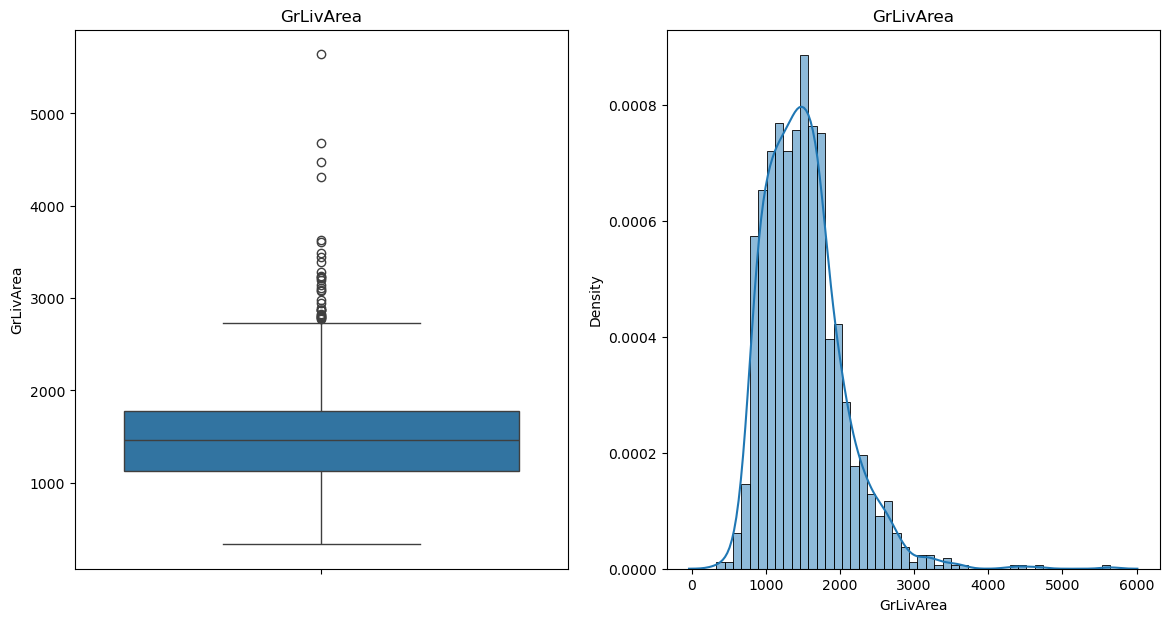

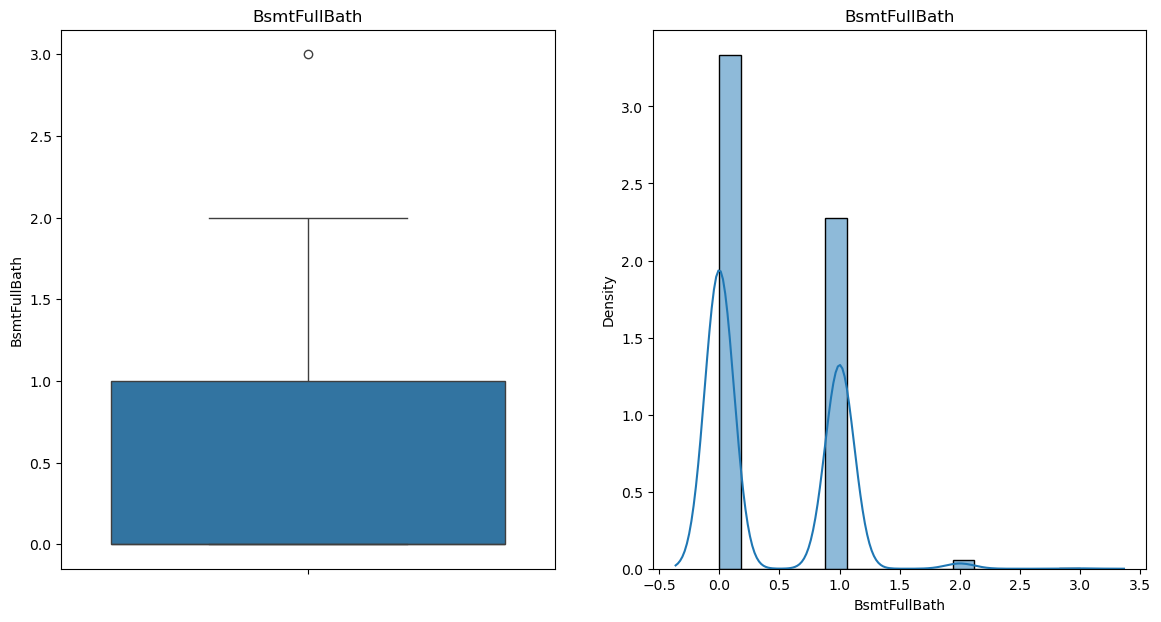

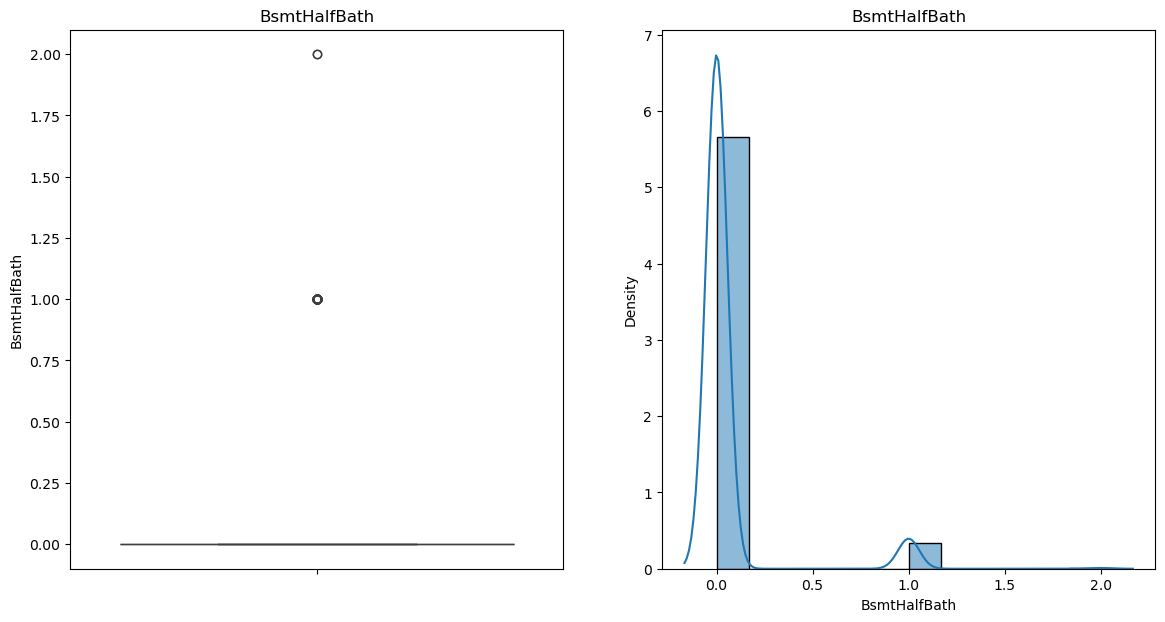

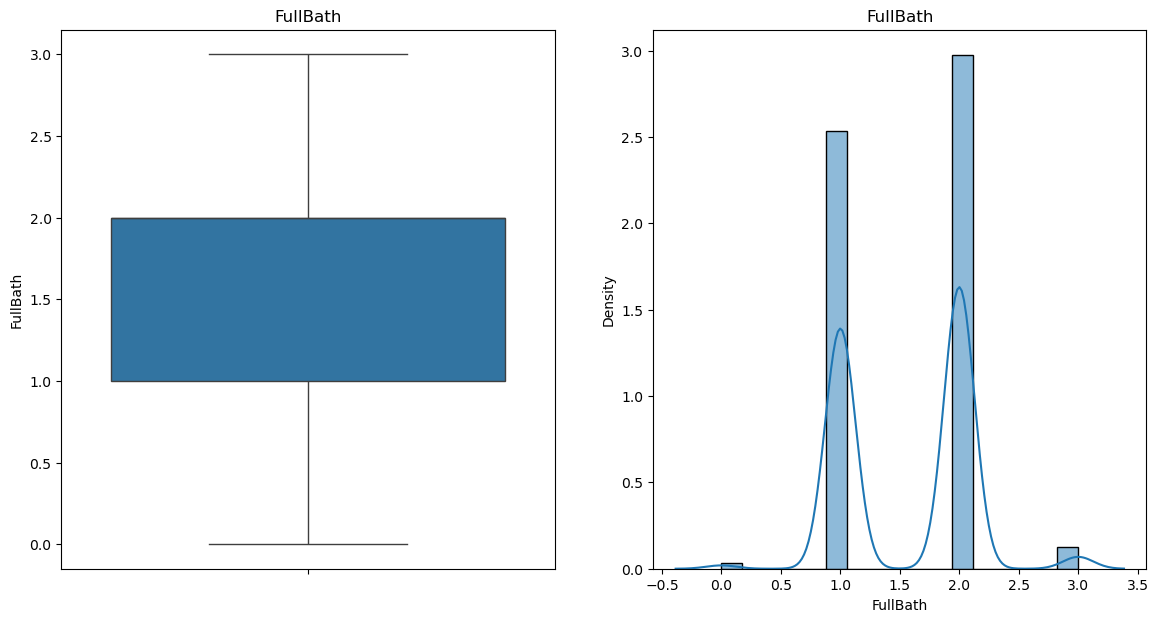

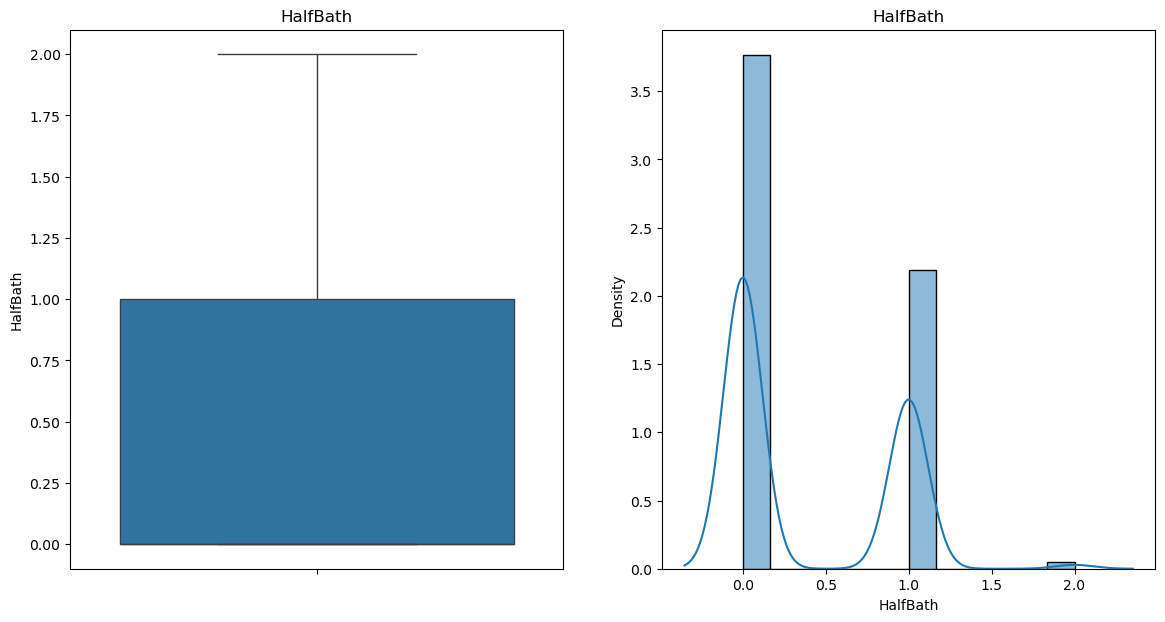

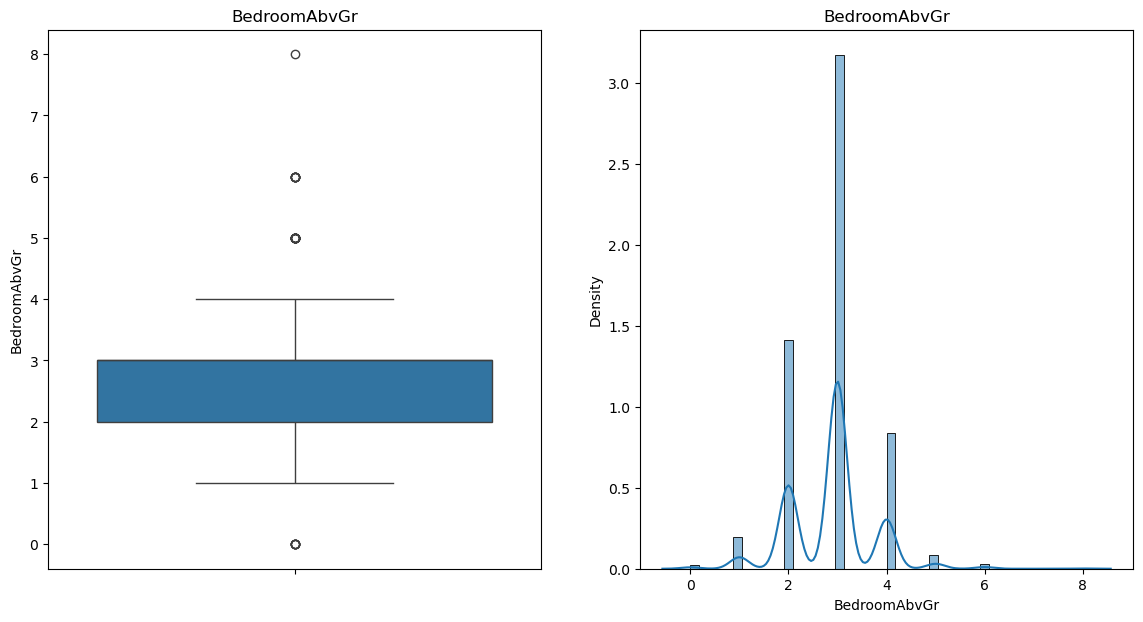

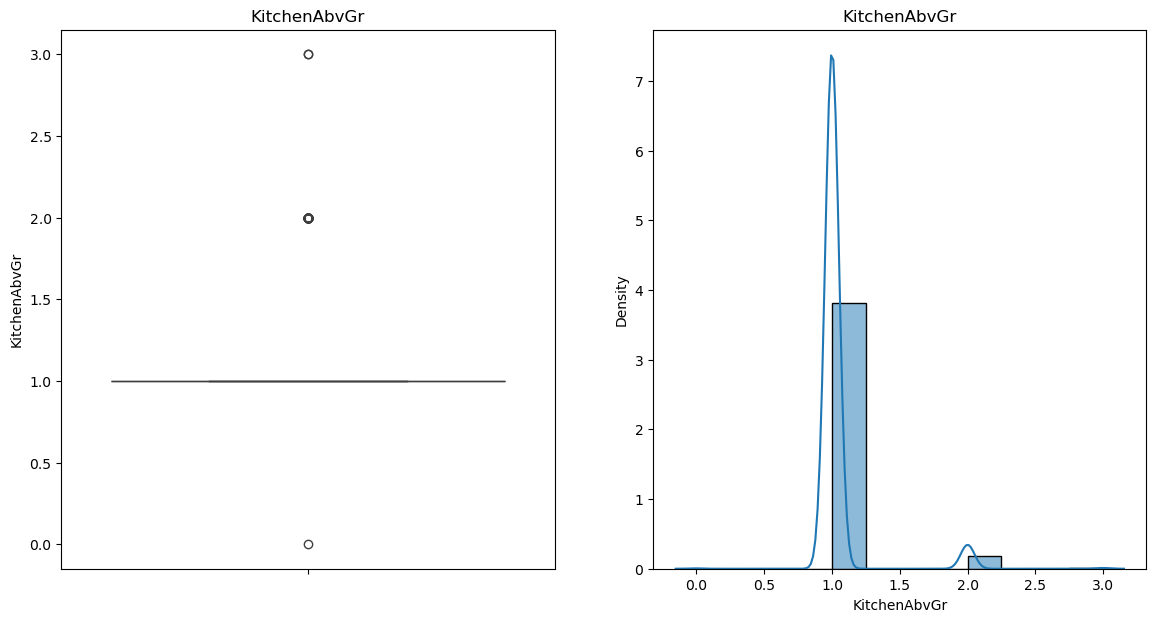

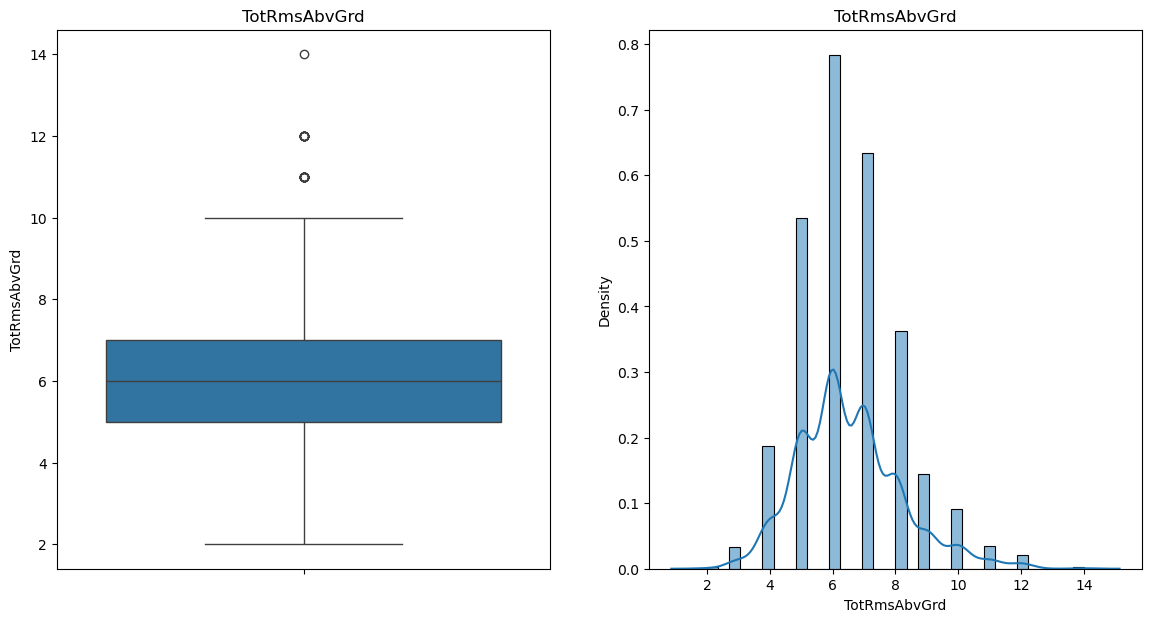

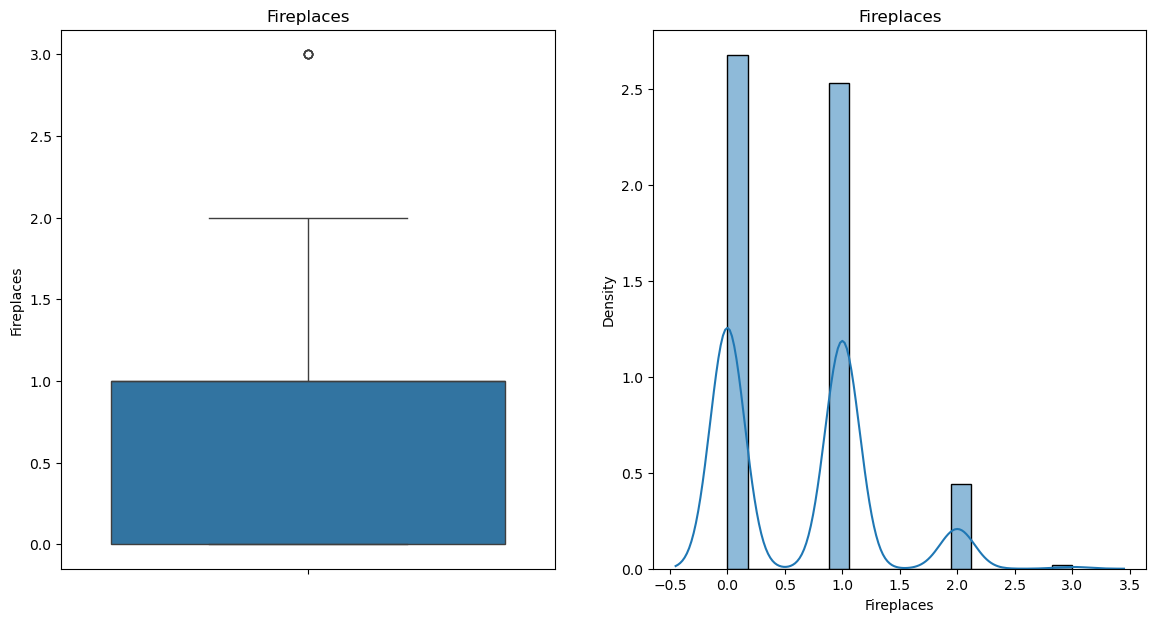

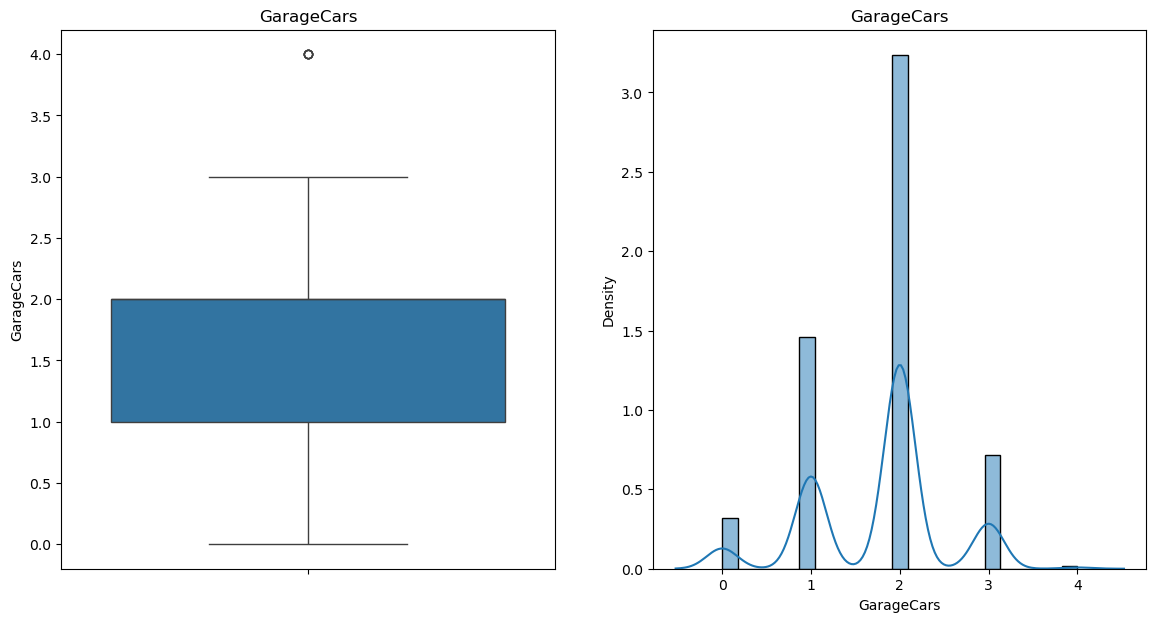

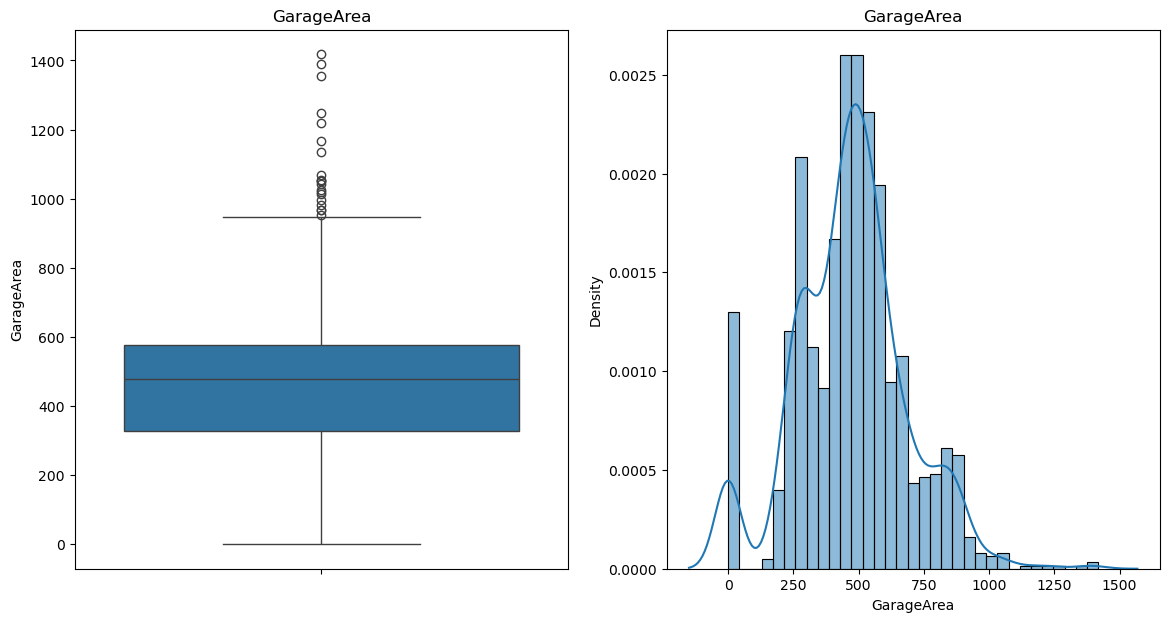

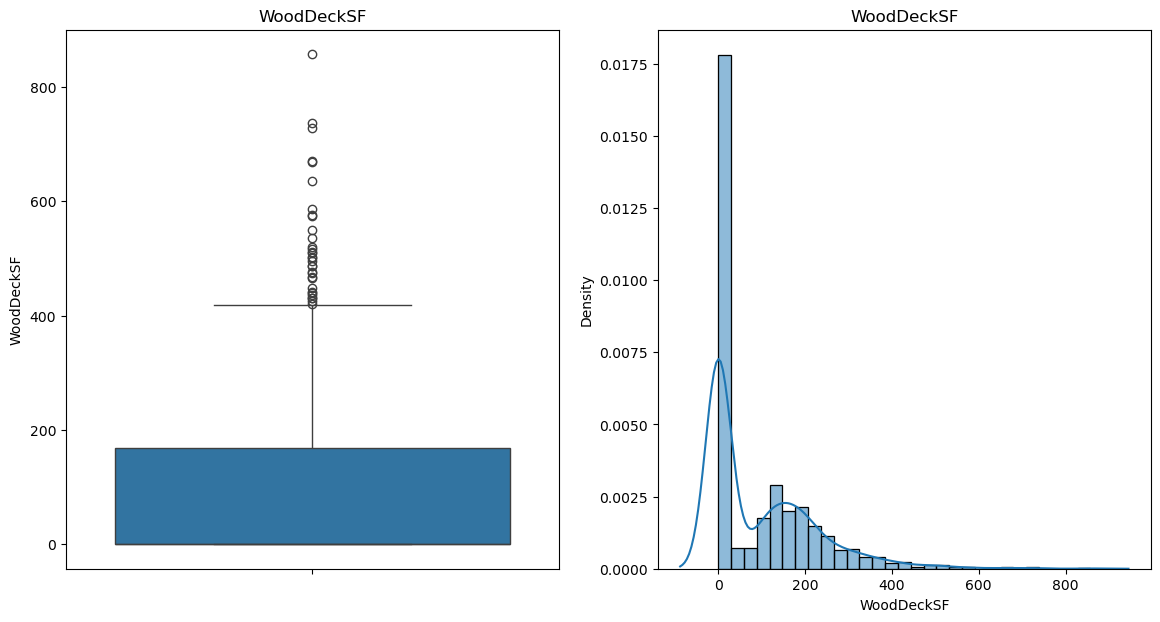

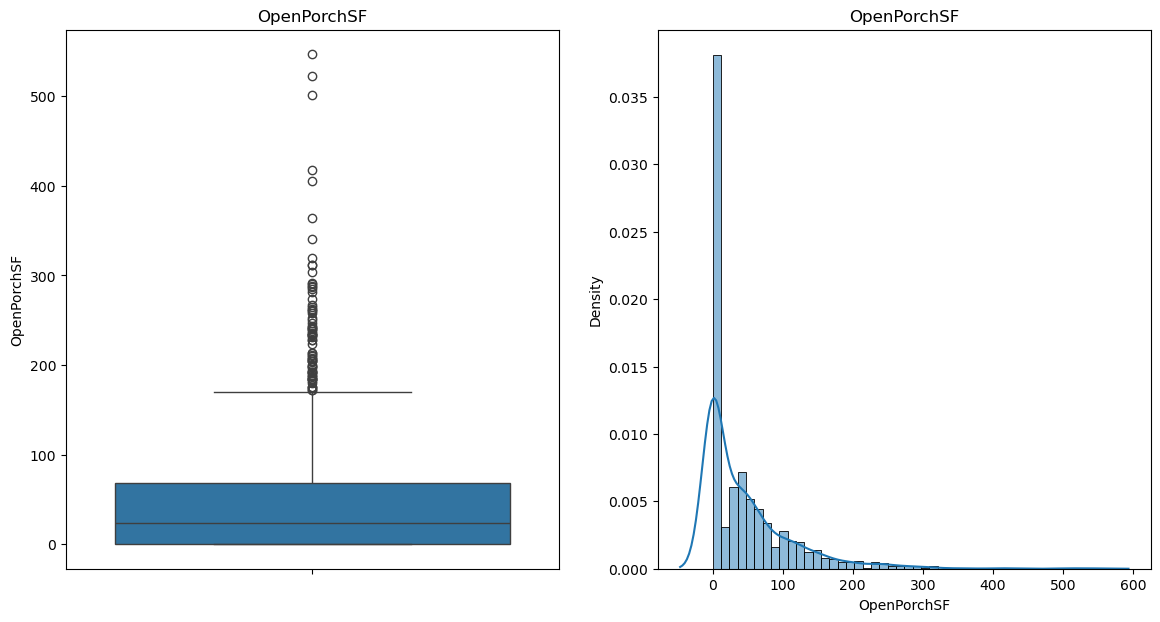

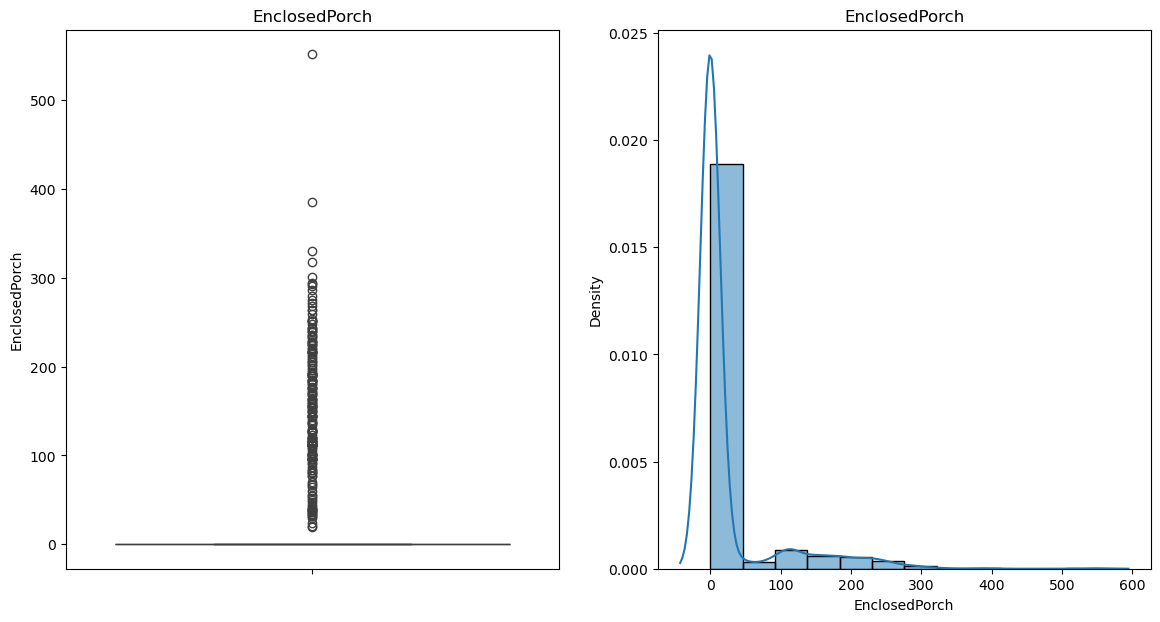

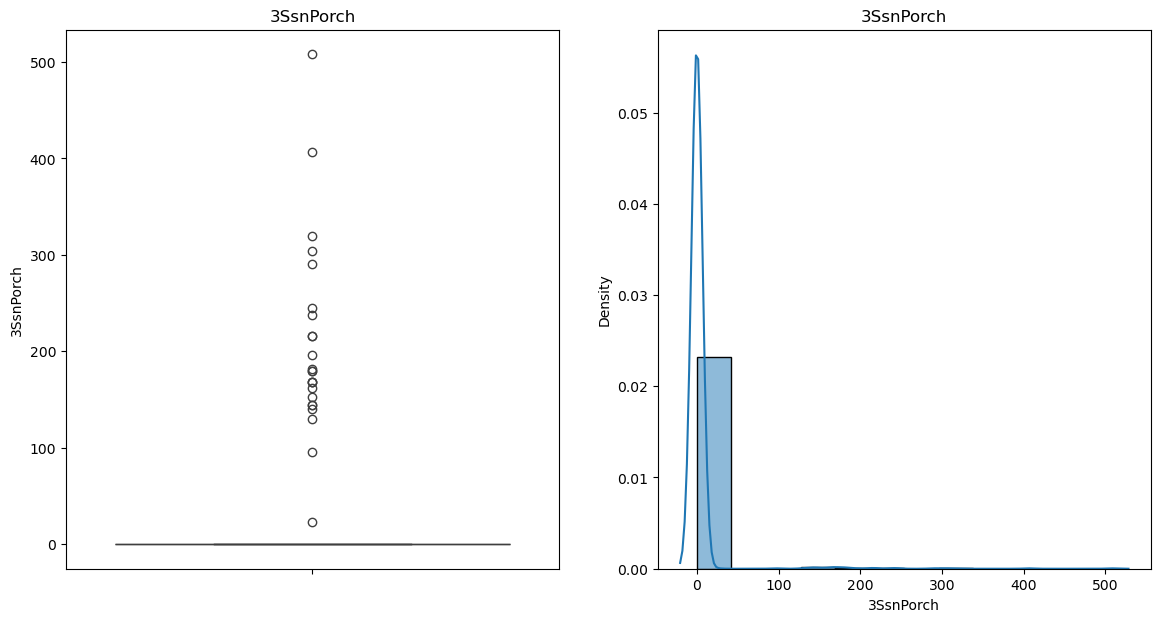

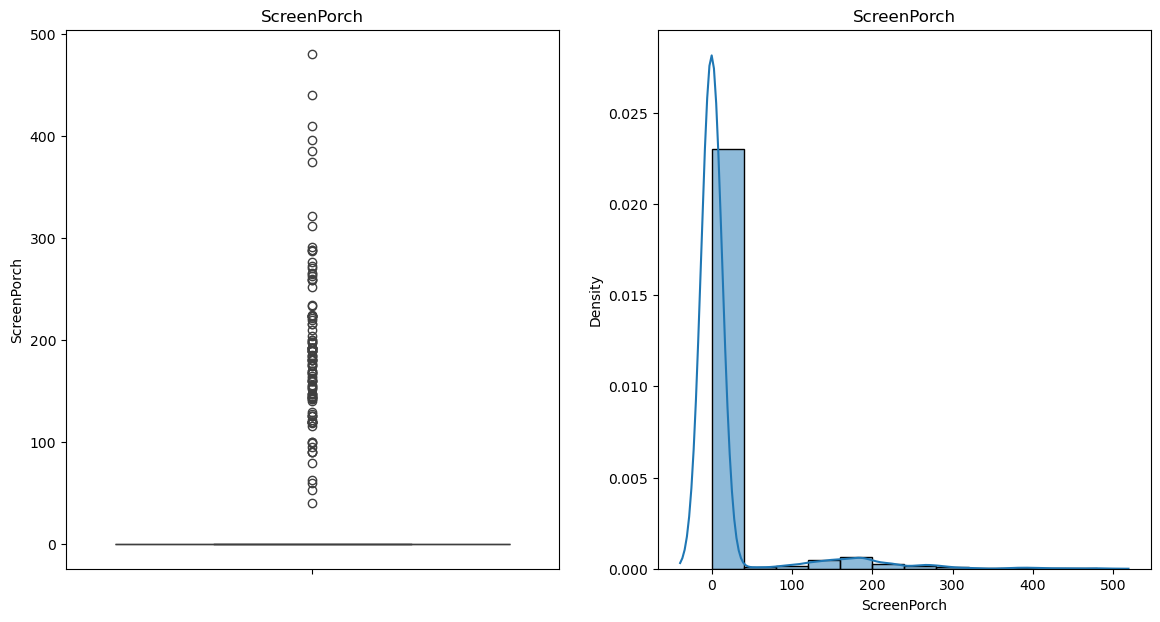

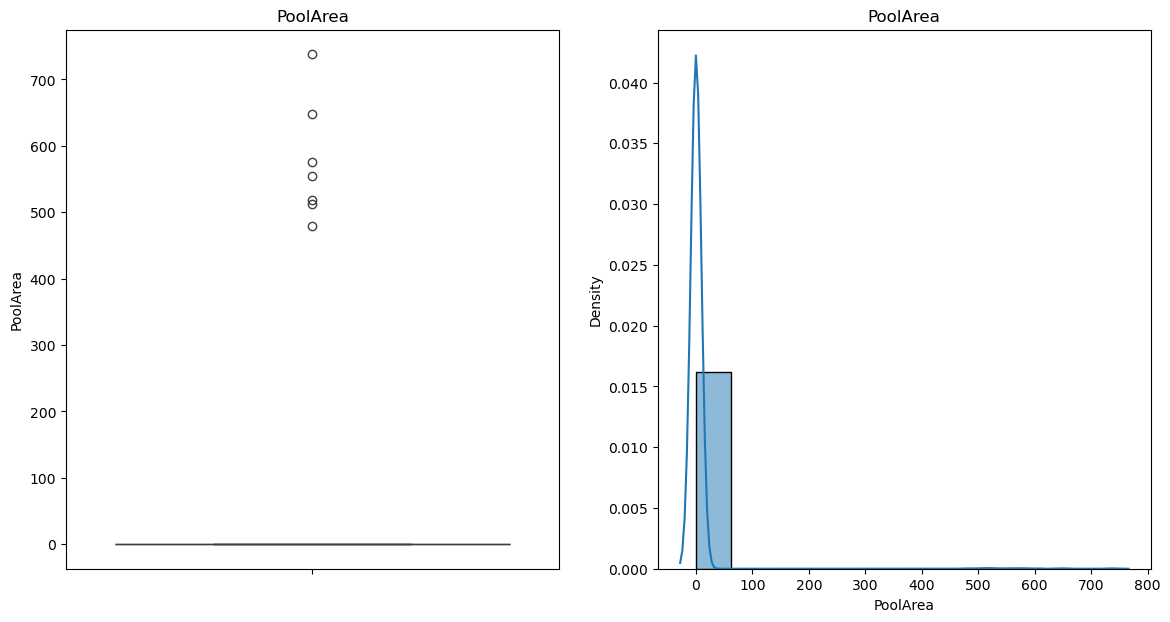

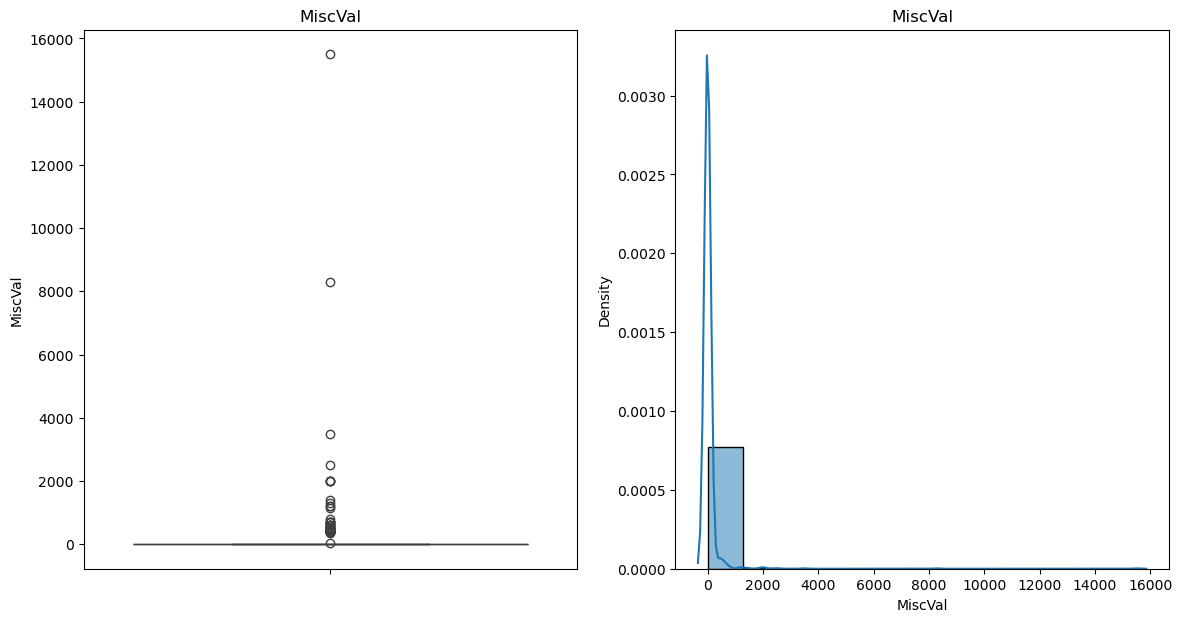

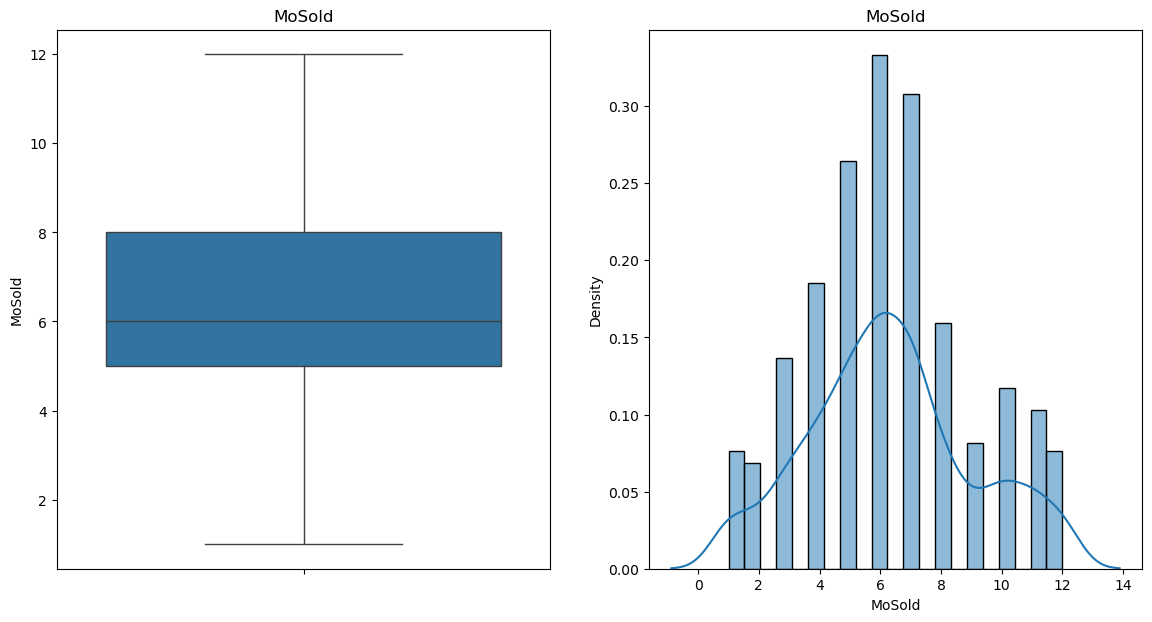

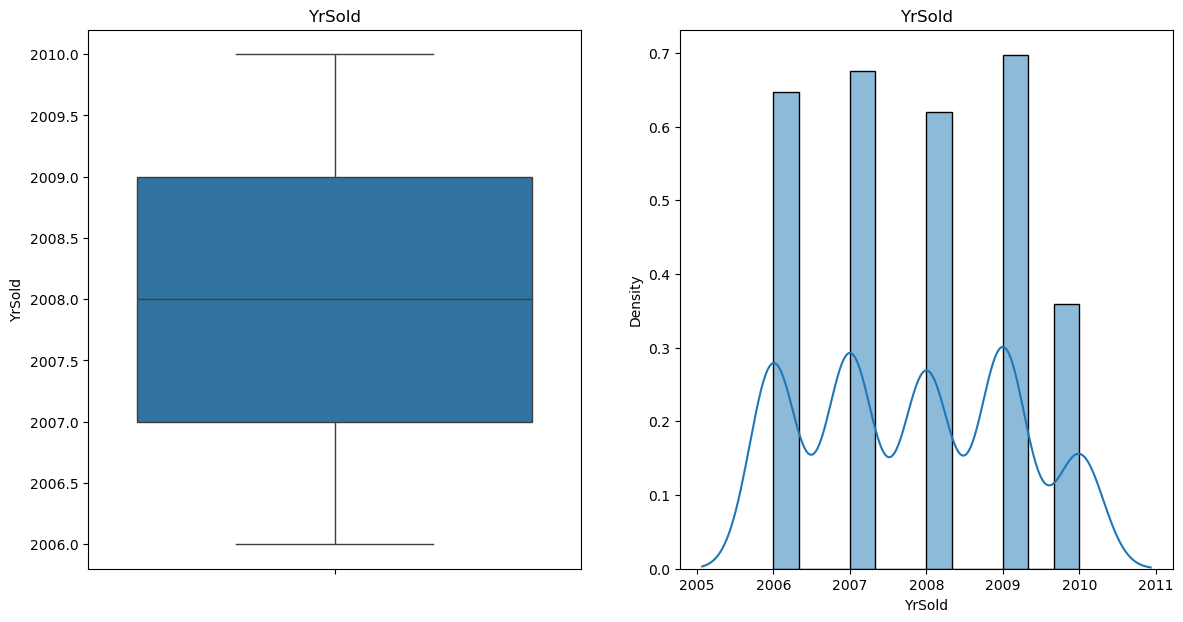

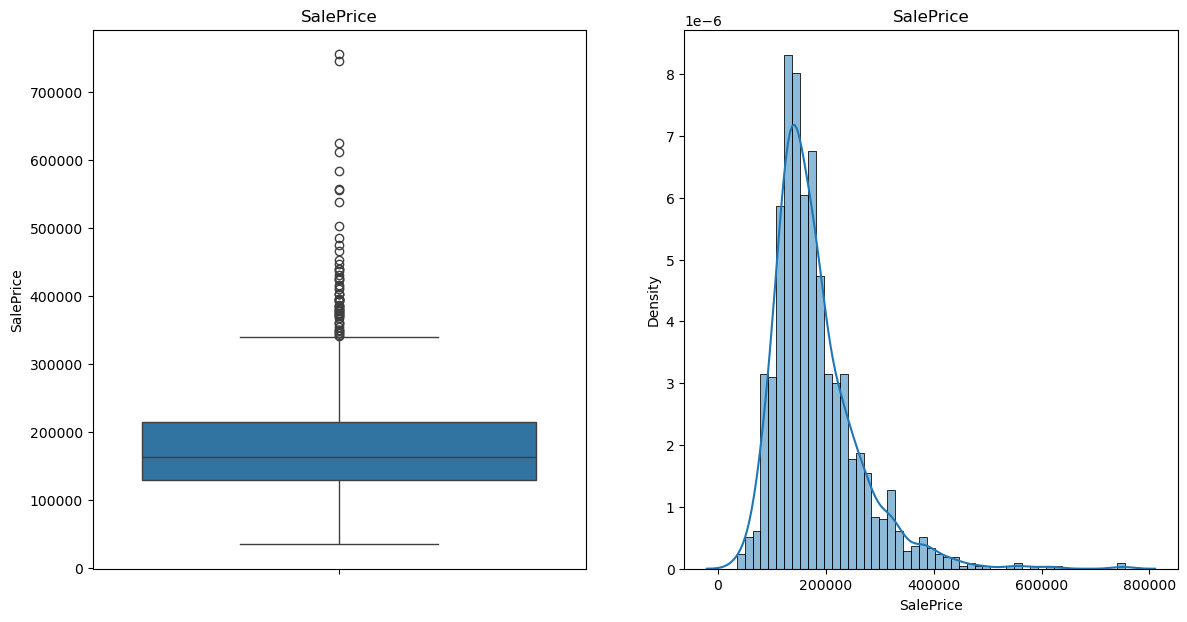

In [101]:
for col in int_feature:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(df[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(df[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

In [102]:
new_df_cap = df.copy()
for col in int_feature:
       percentile25 = df[col].quantile(0.25)
       percentile75 = df[col].quantile(0.75)

       iqr = percentile75 - percentile25

       upper_limit = percentile75 + 1.5 * iqr
       lower_limit = percentile25 - 1.5 * iqr
       
       #capping
       new_df_cap[col] = np.where(
         new_df_cap[col] > upper_limit,
         upper_limit,
         np.where(
                  new_df_cap[col] < lower_limit,
                  lower_limit,
                  new_df_cap[col]
                  )
       )

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15720\1538234842.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,7))


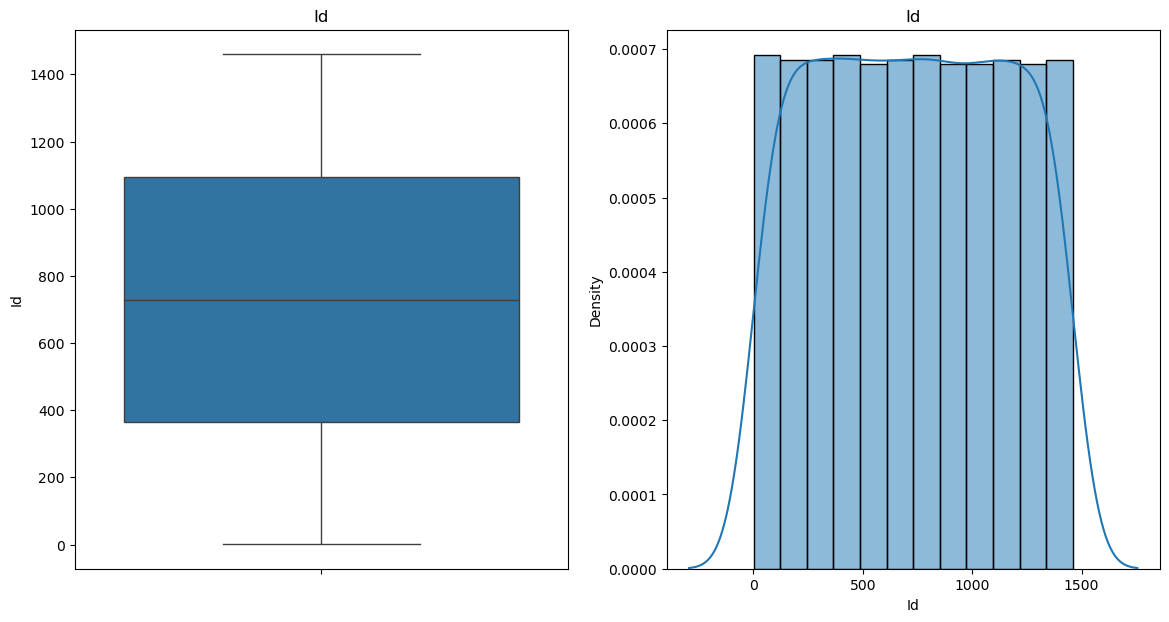

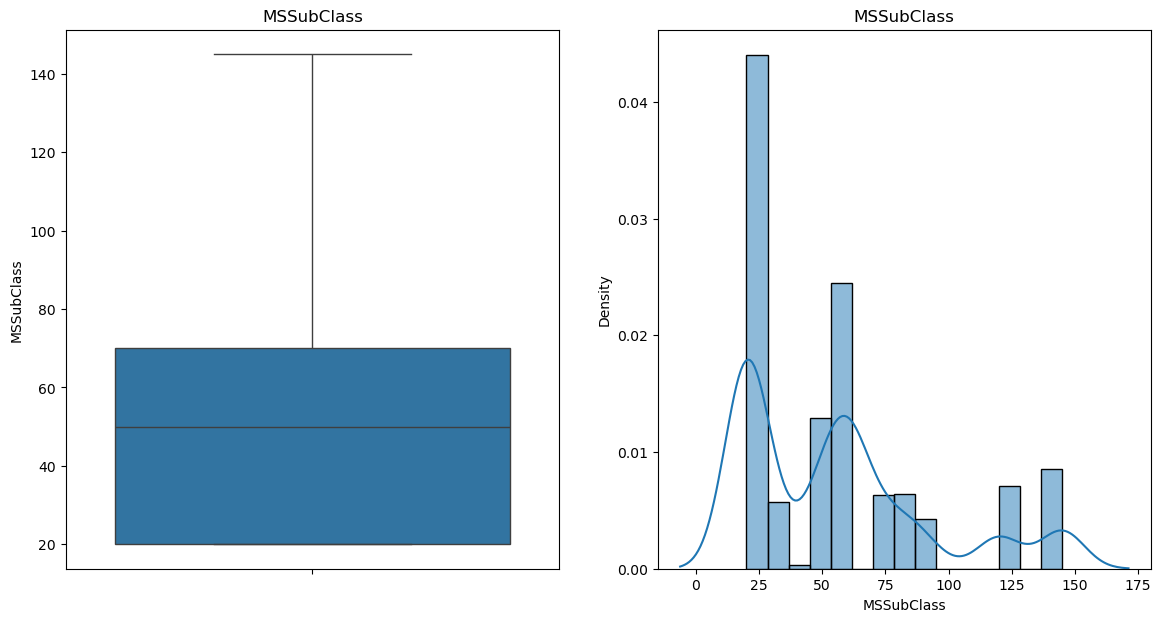

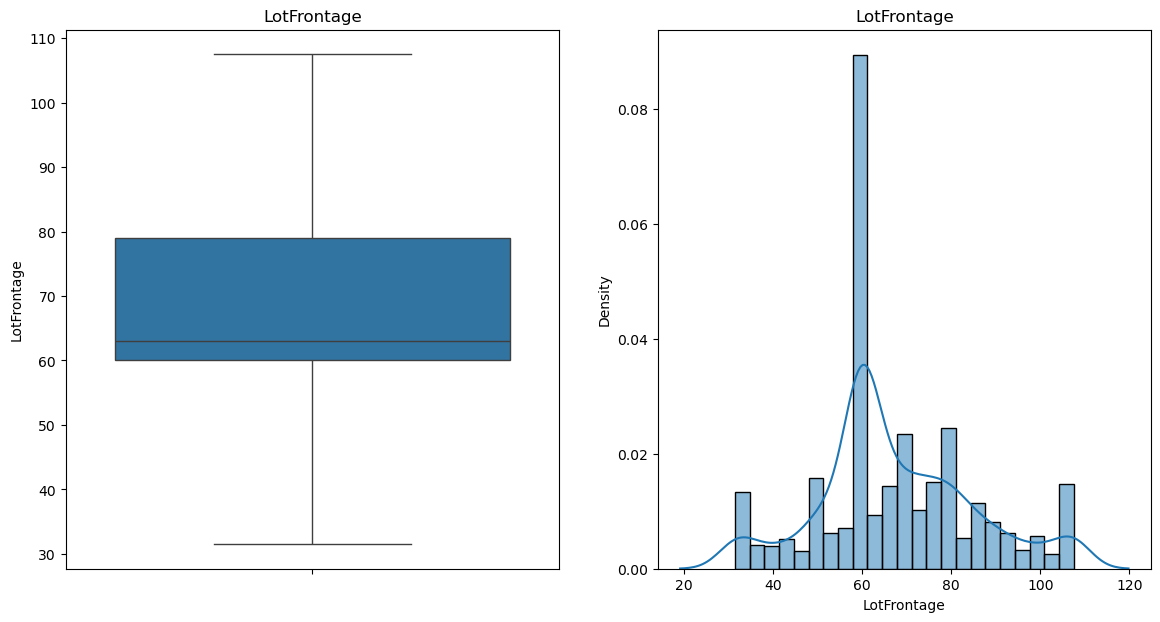

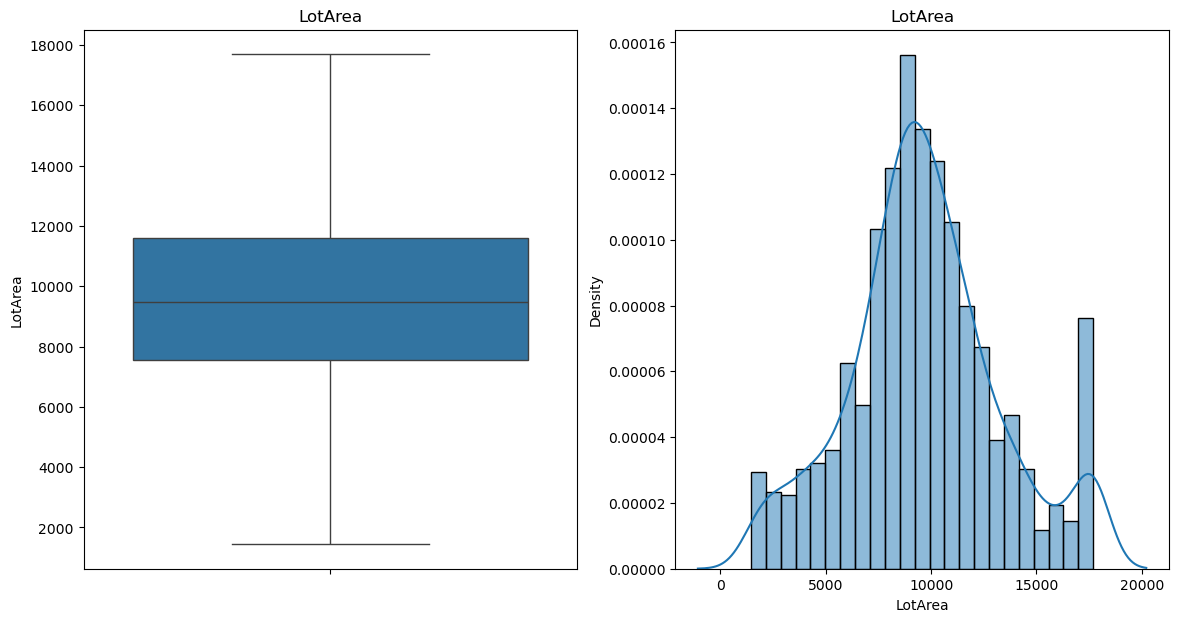

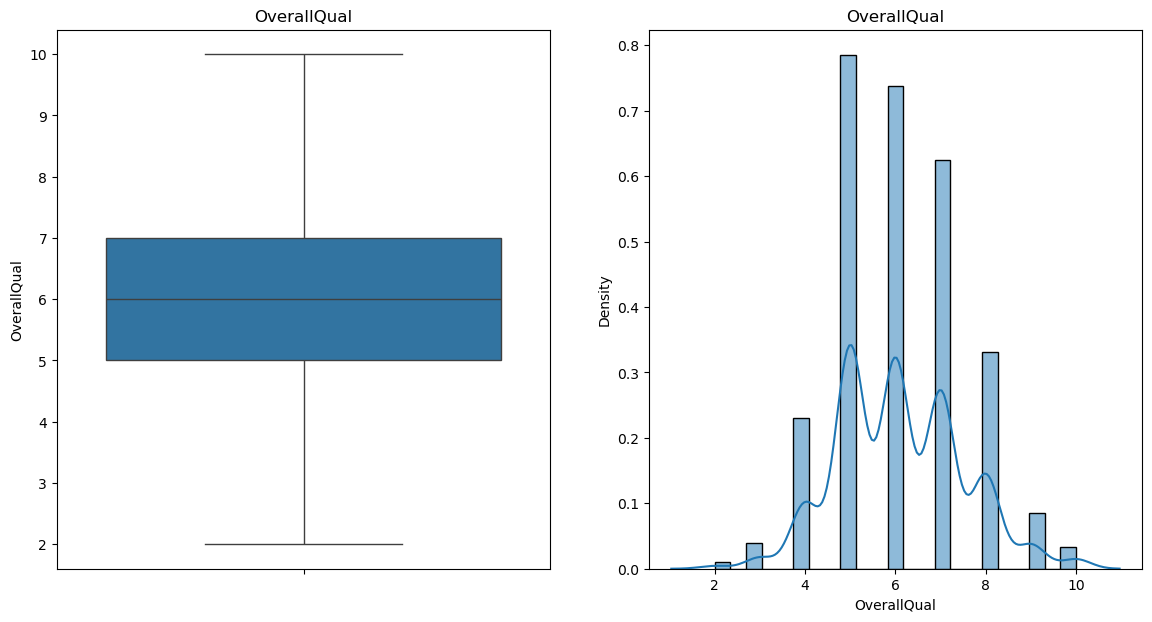

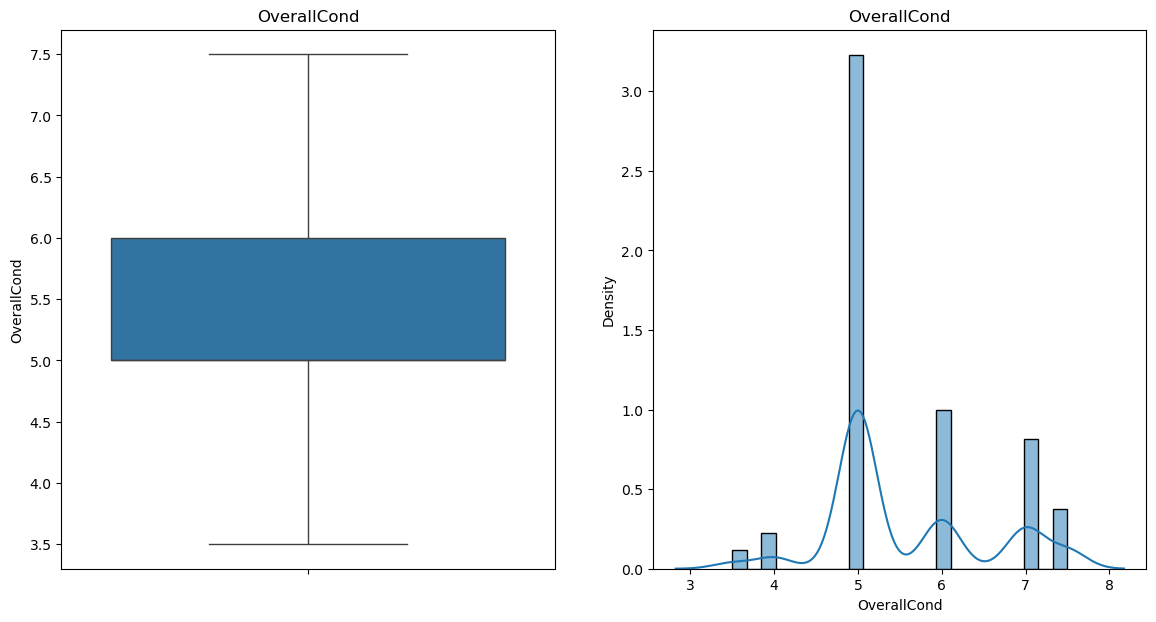

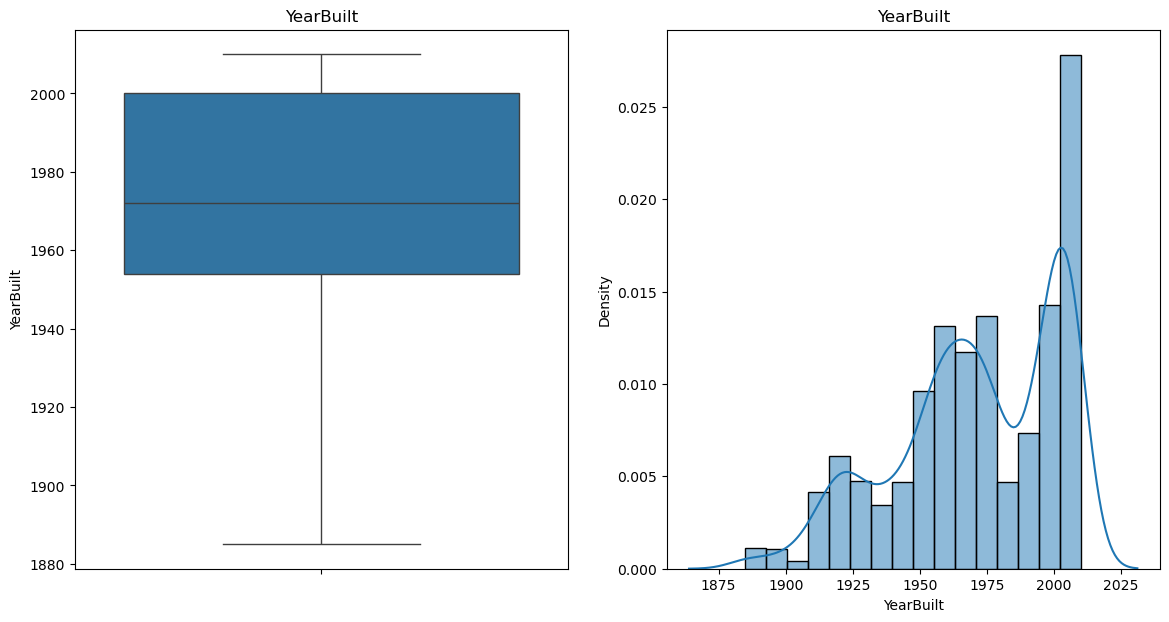

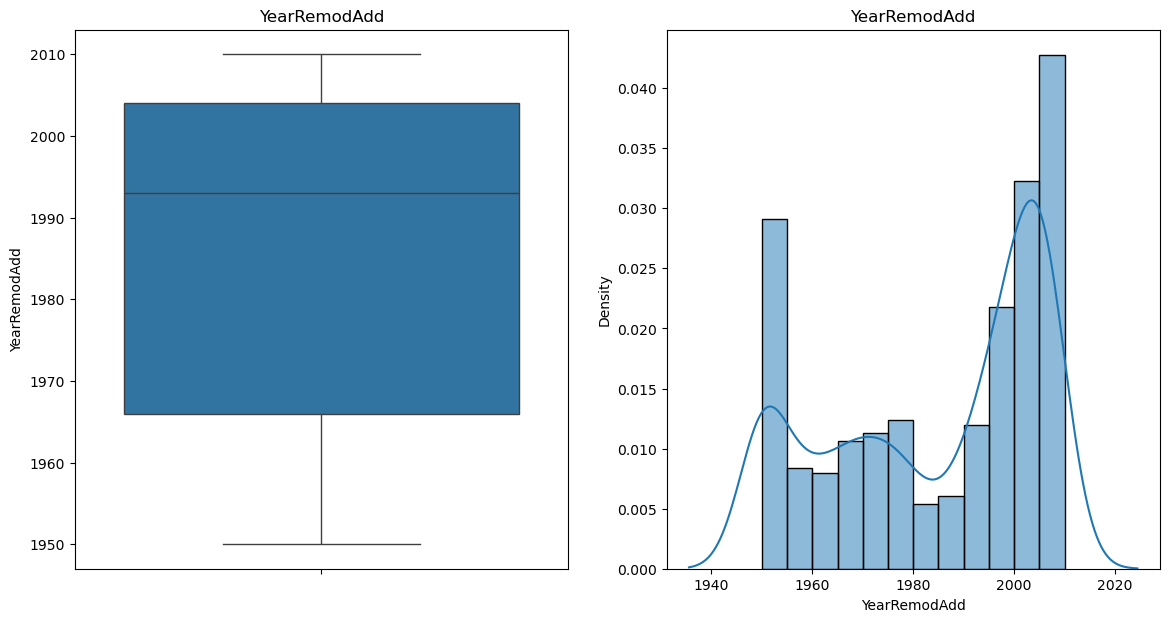

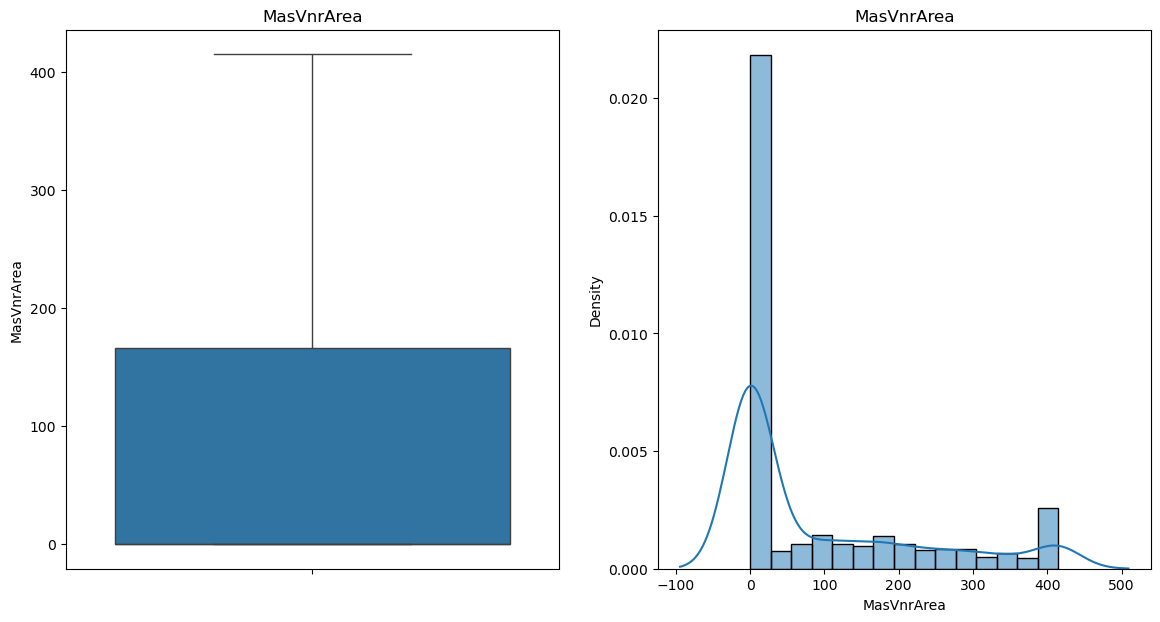

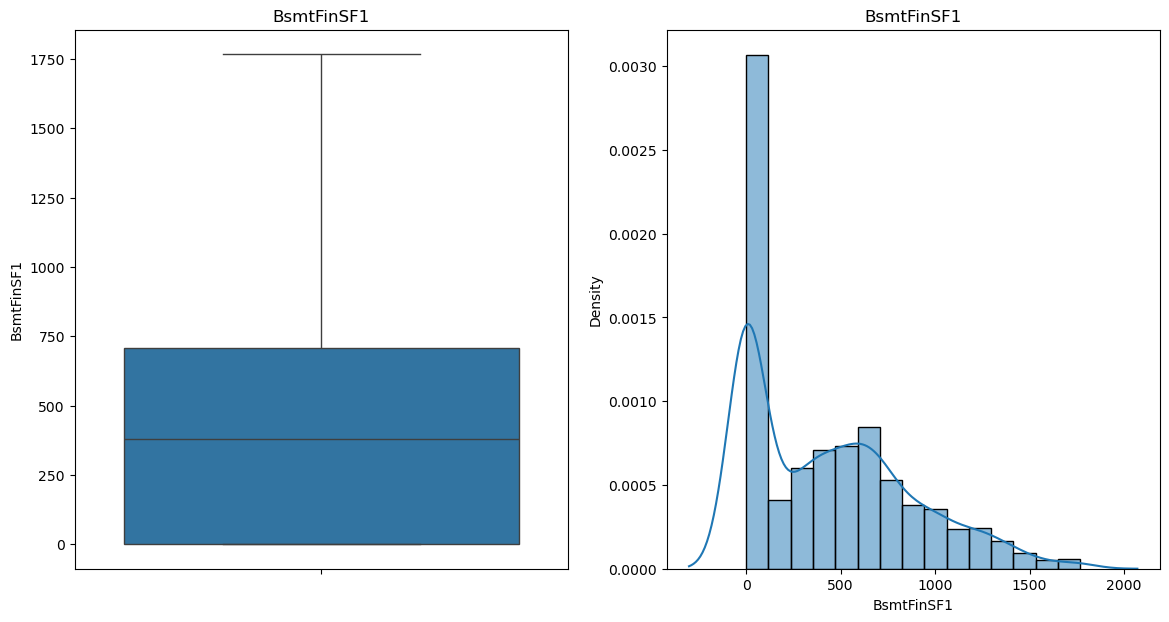

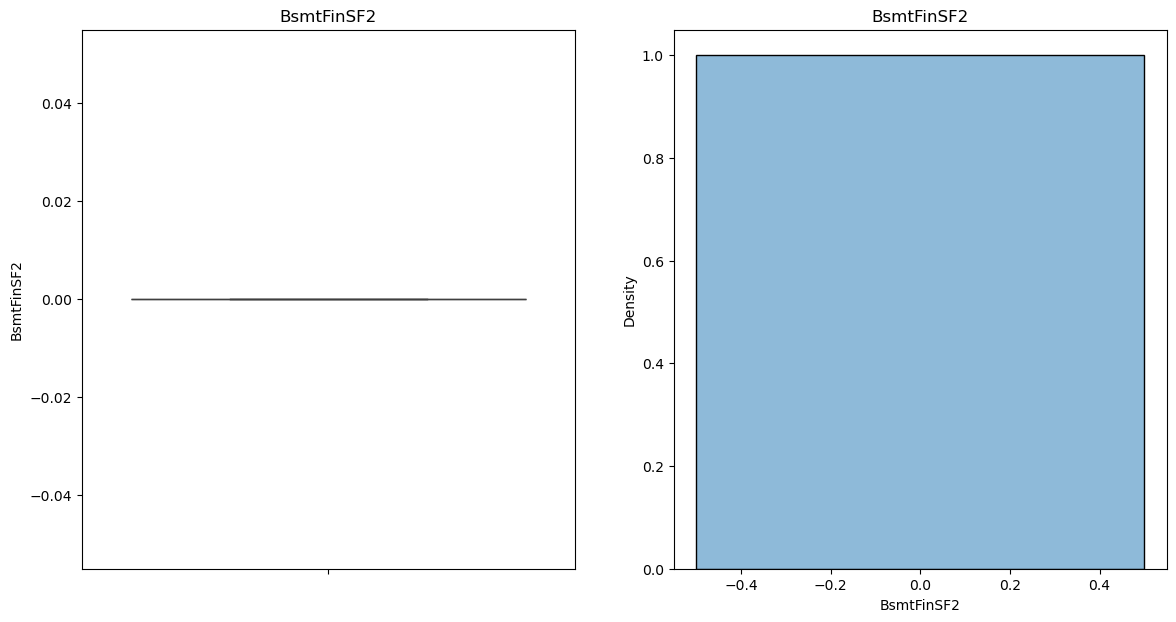

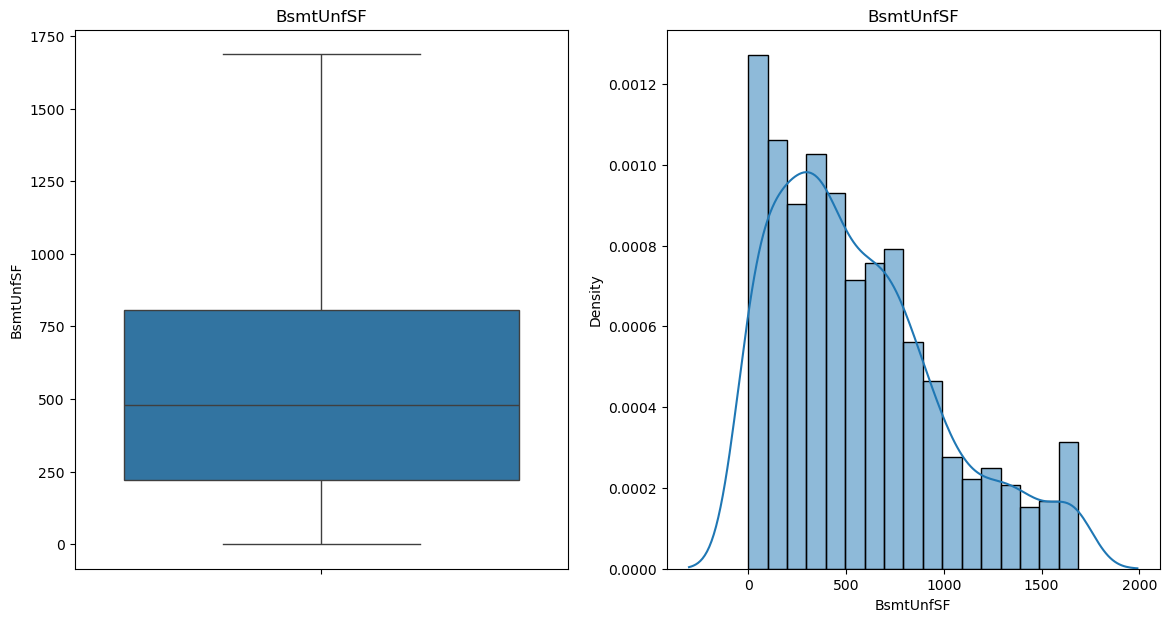

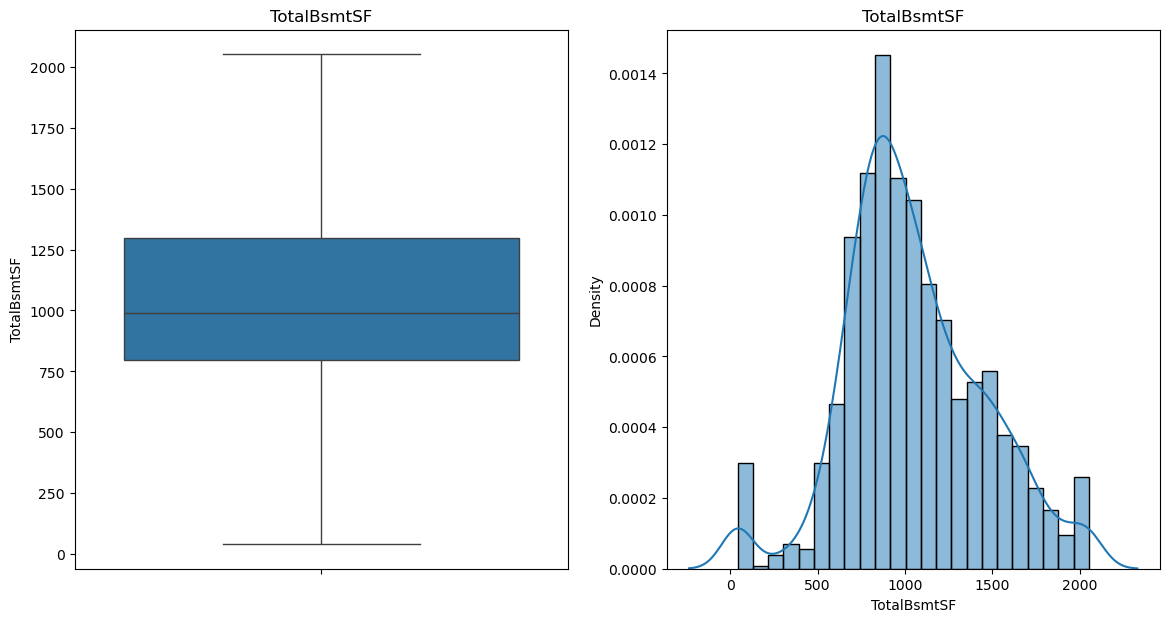

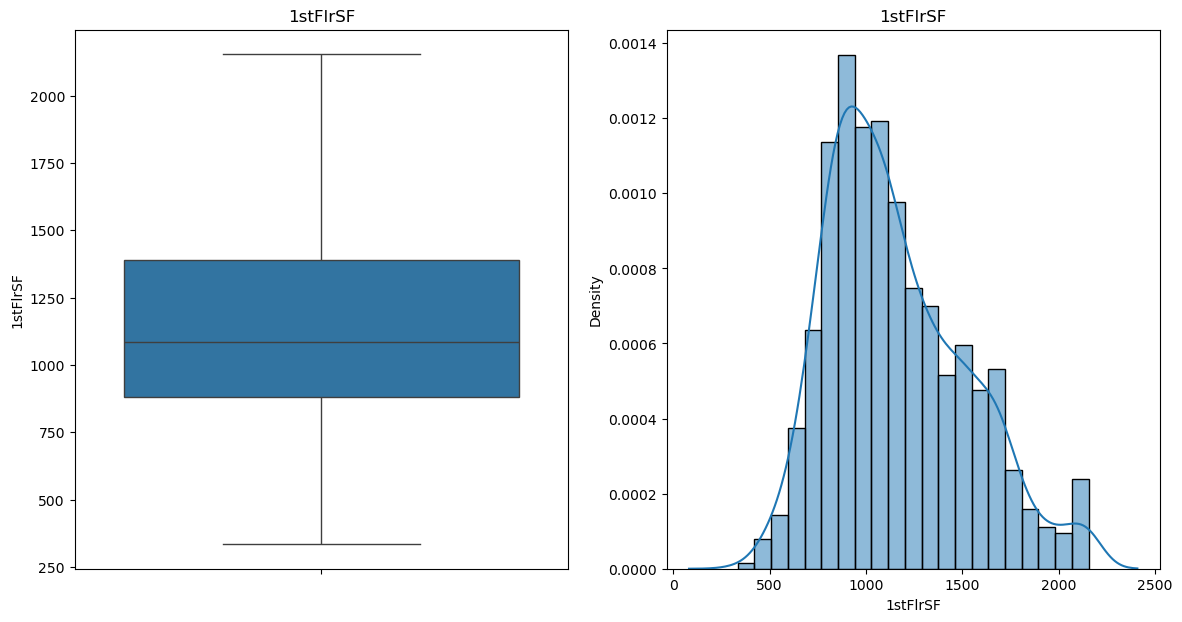

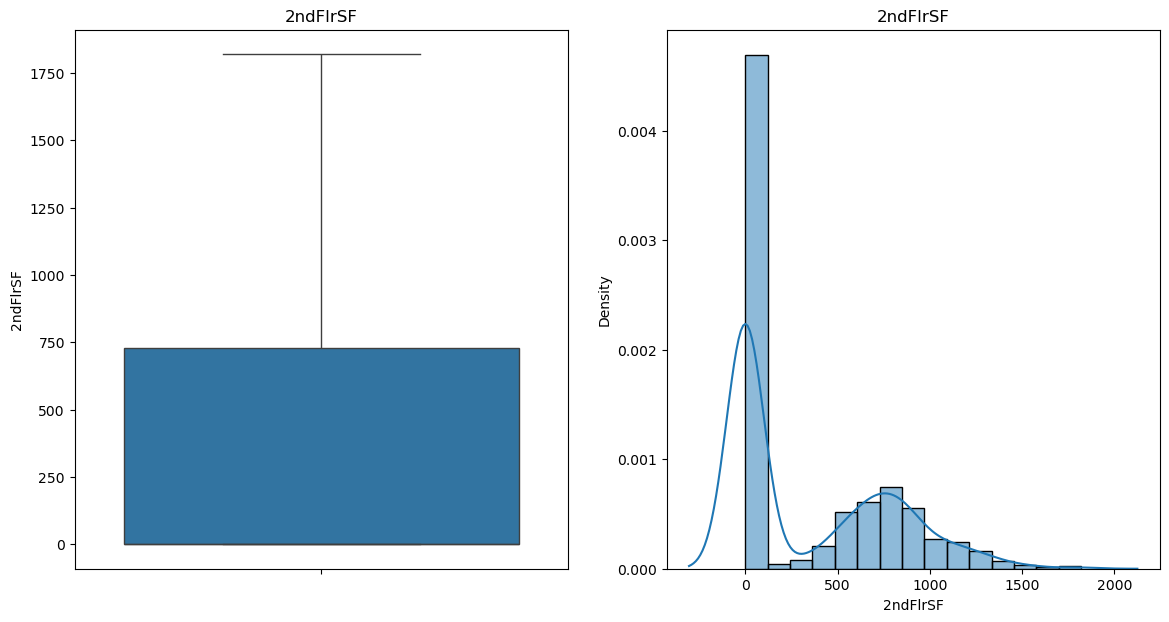

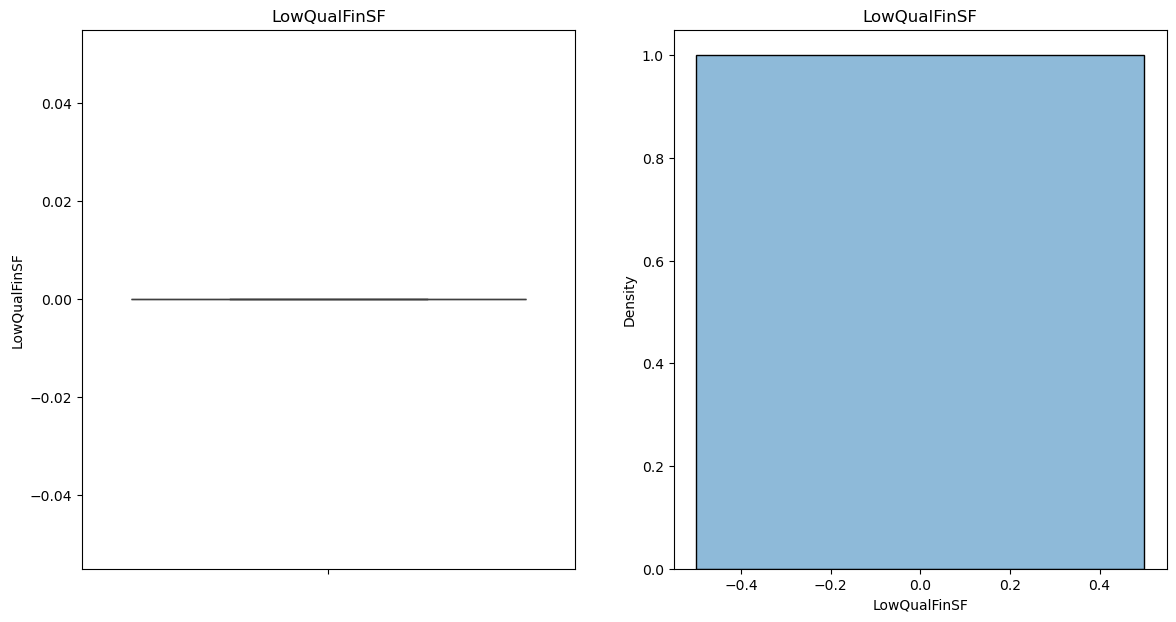

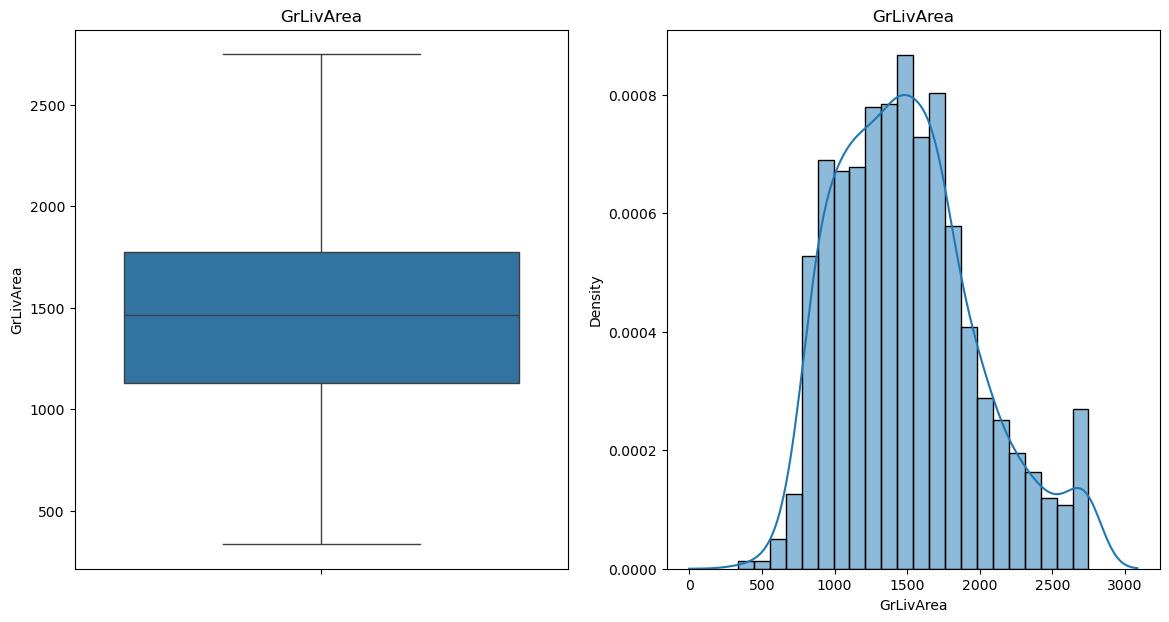

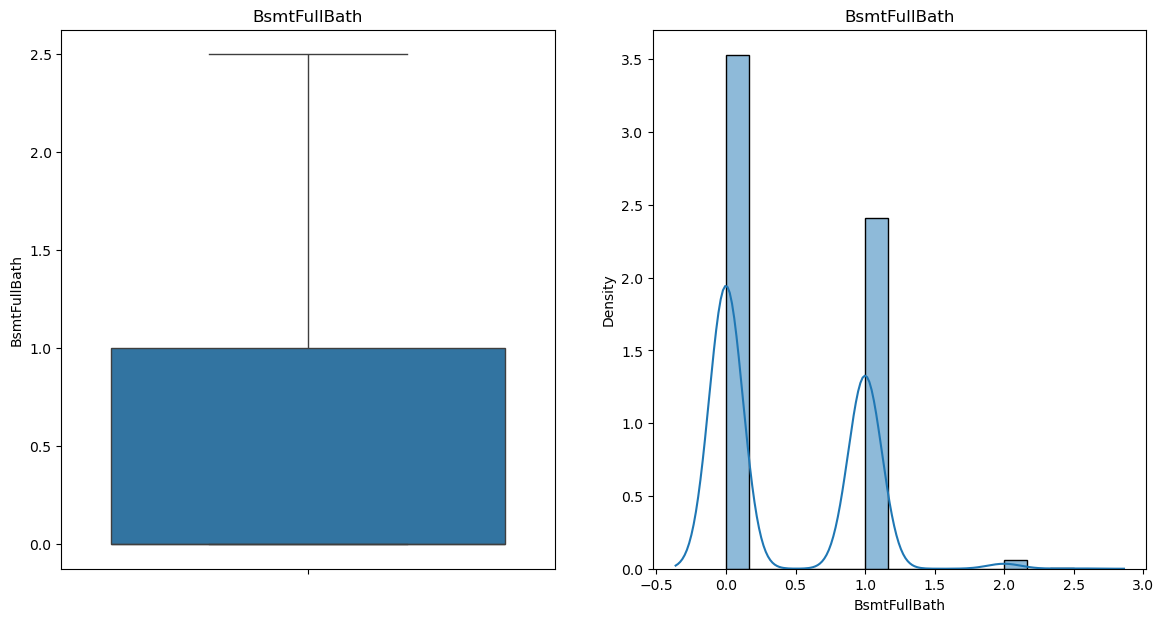

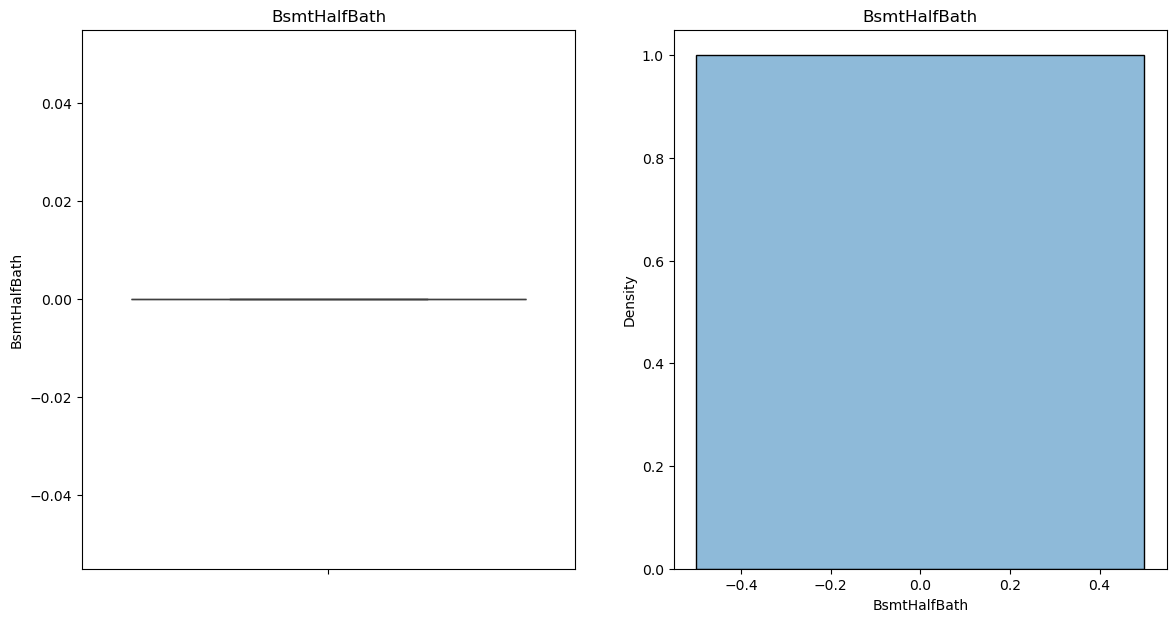

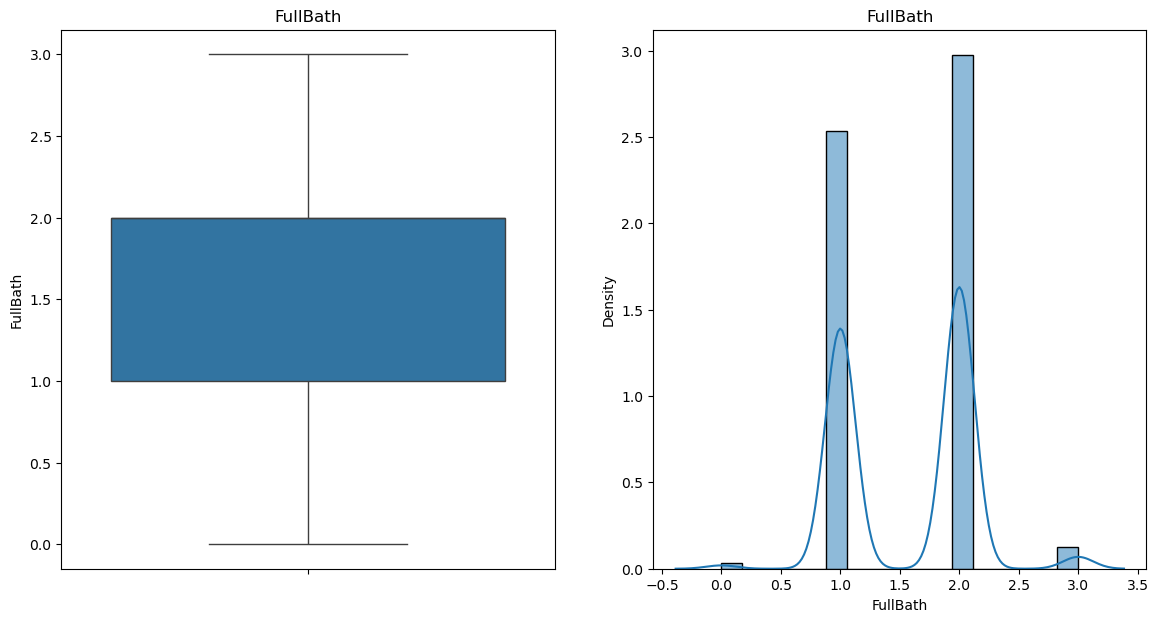

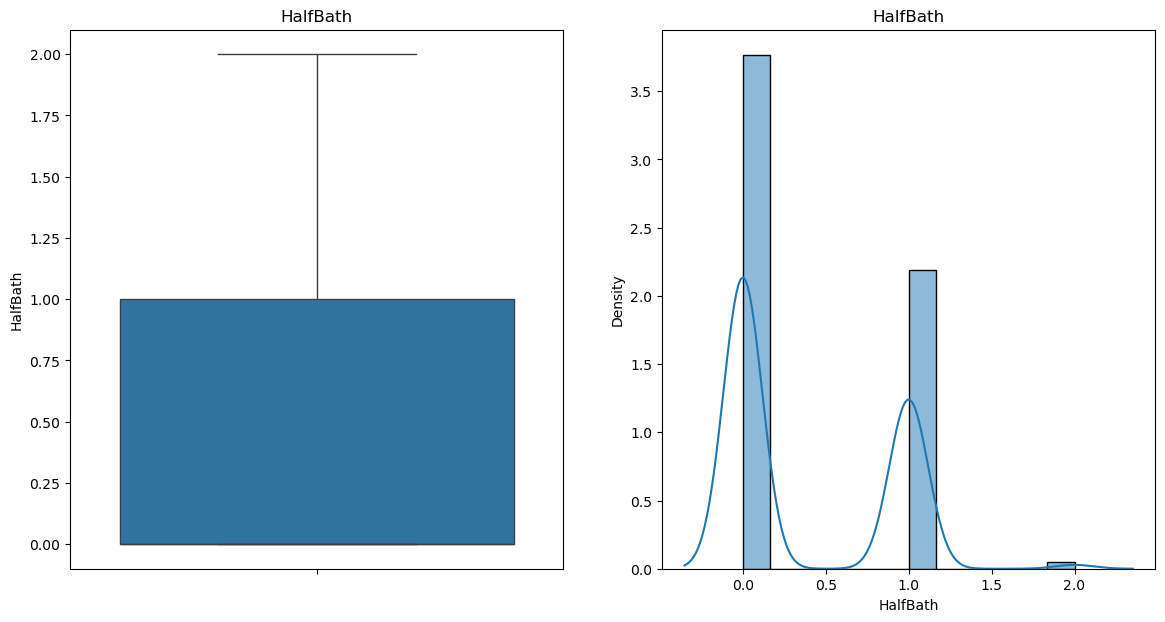

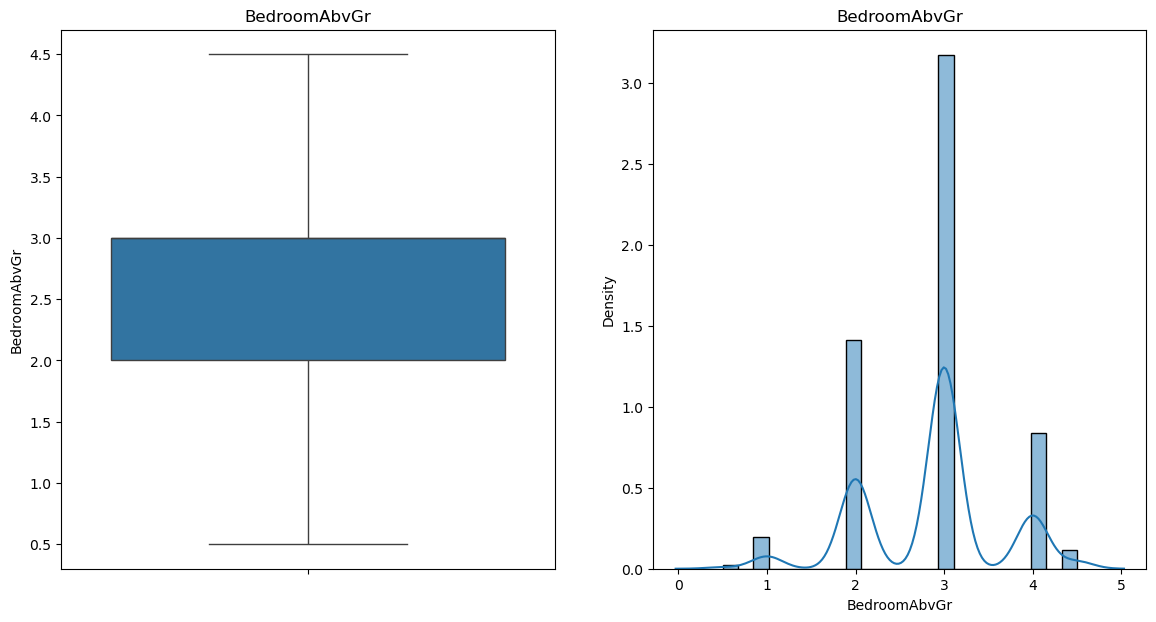

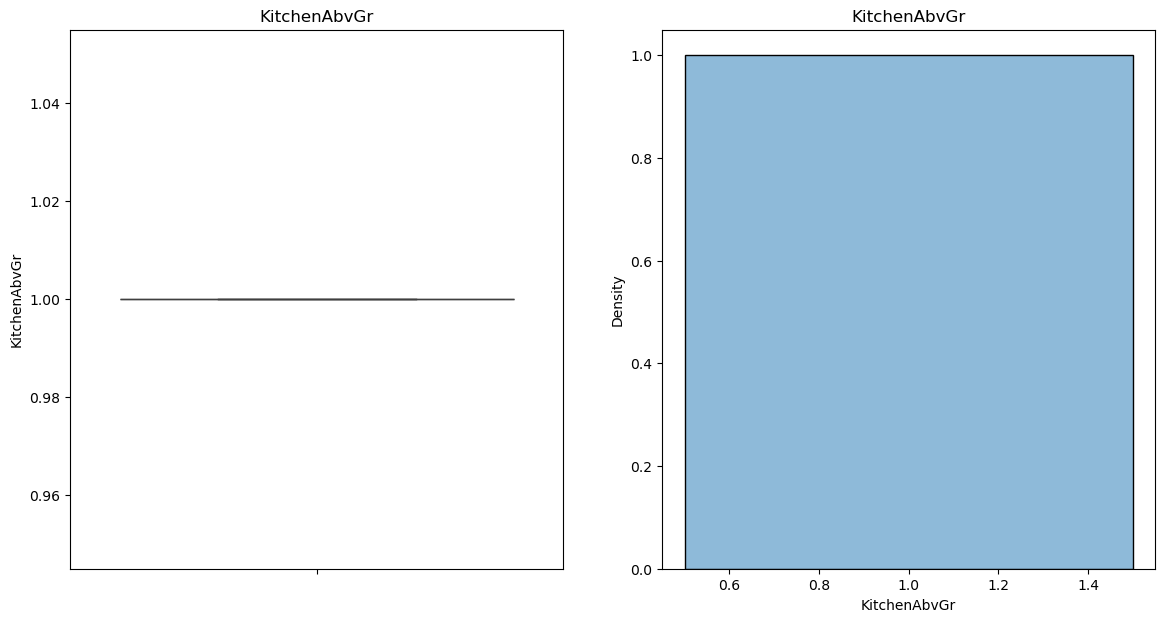

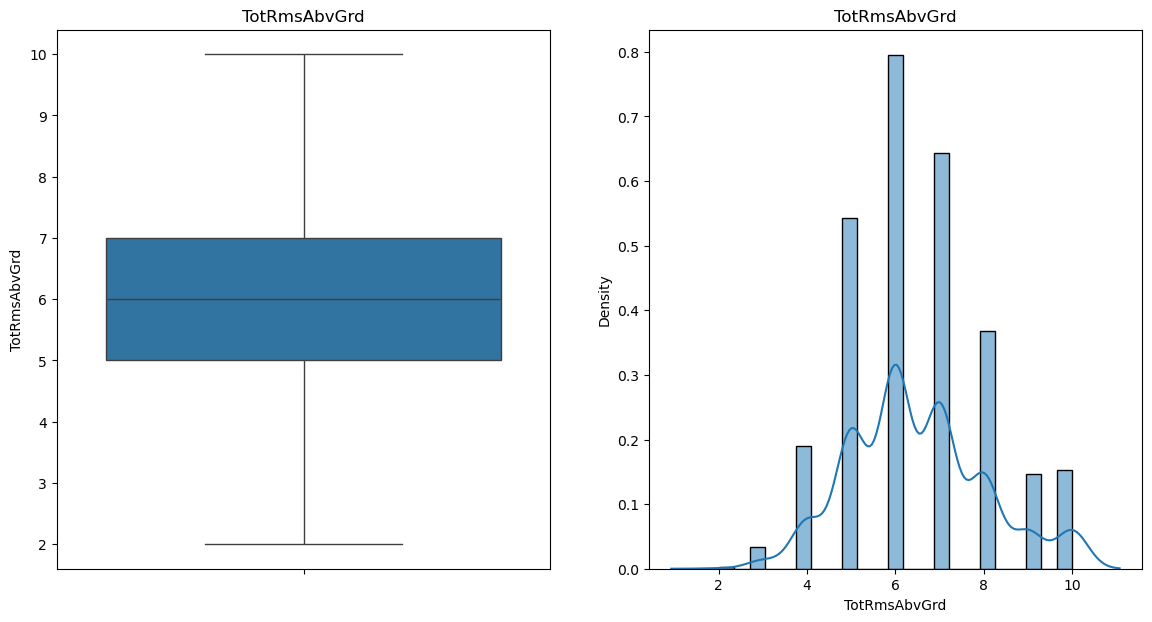

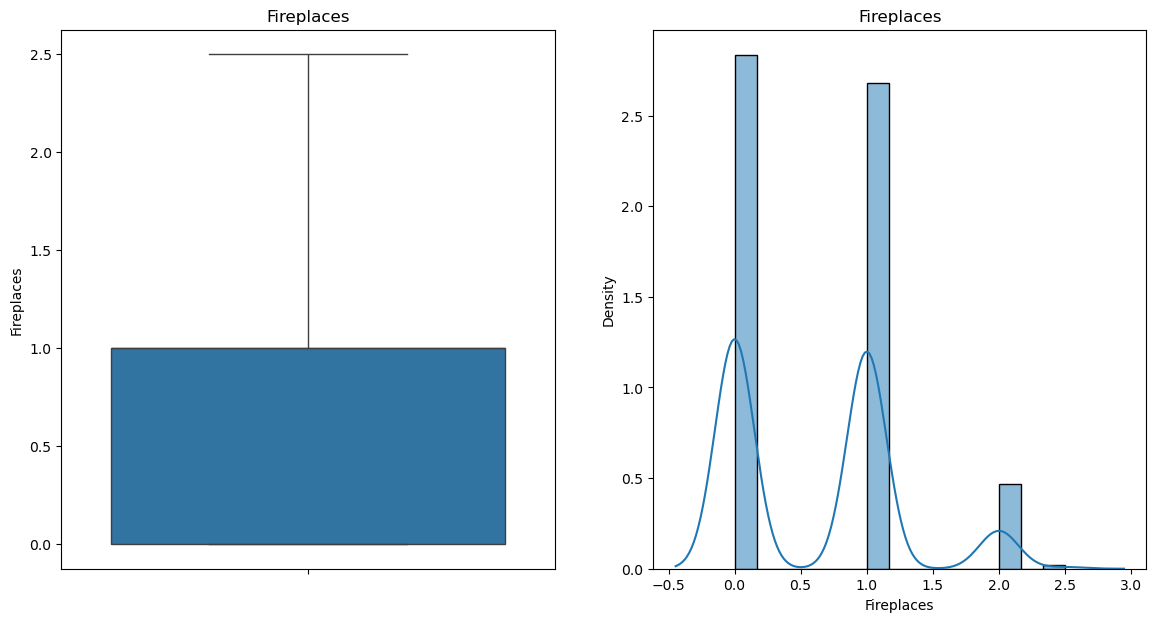

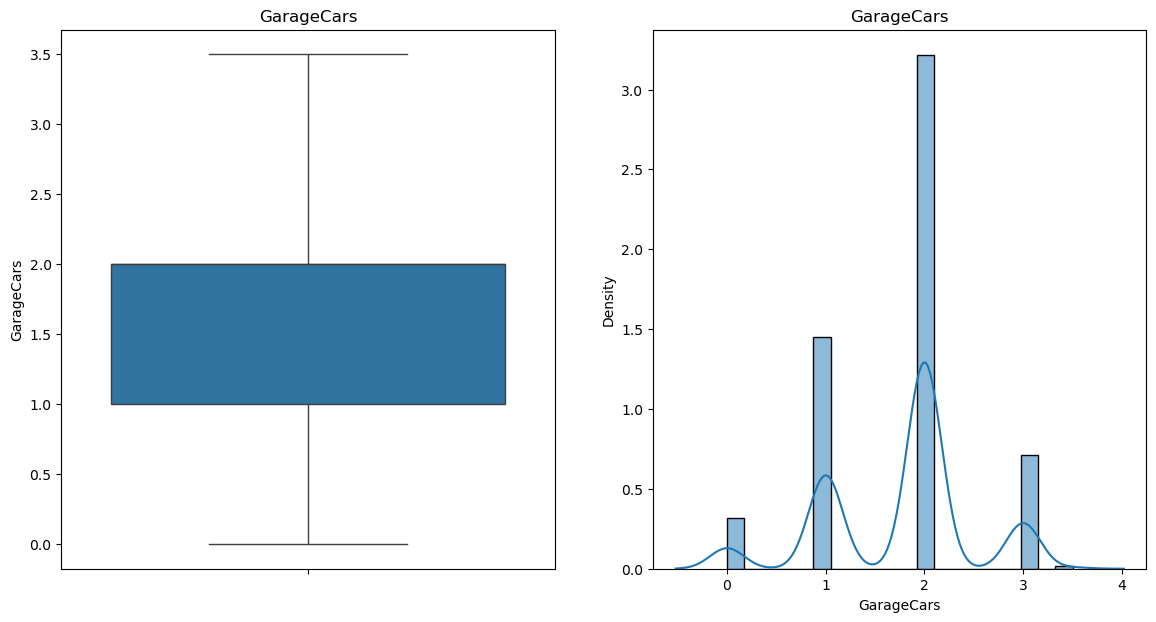

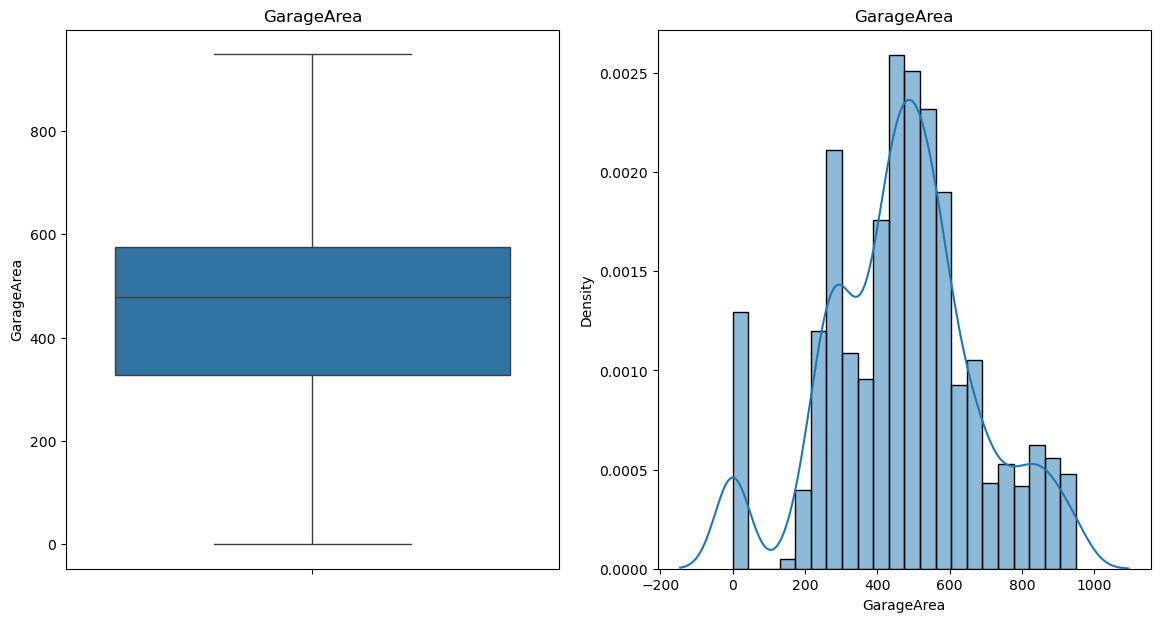

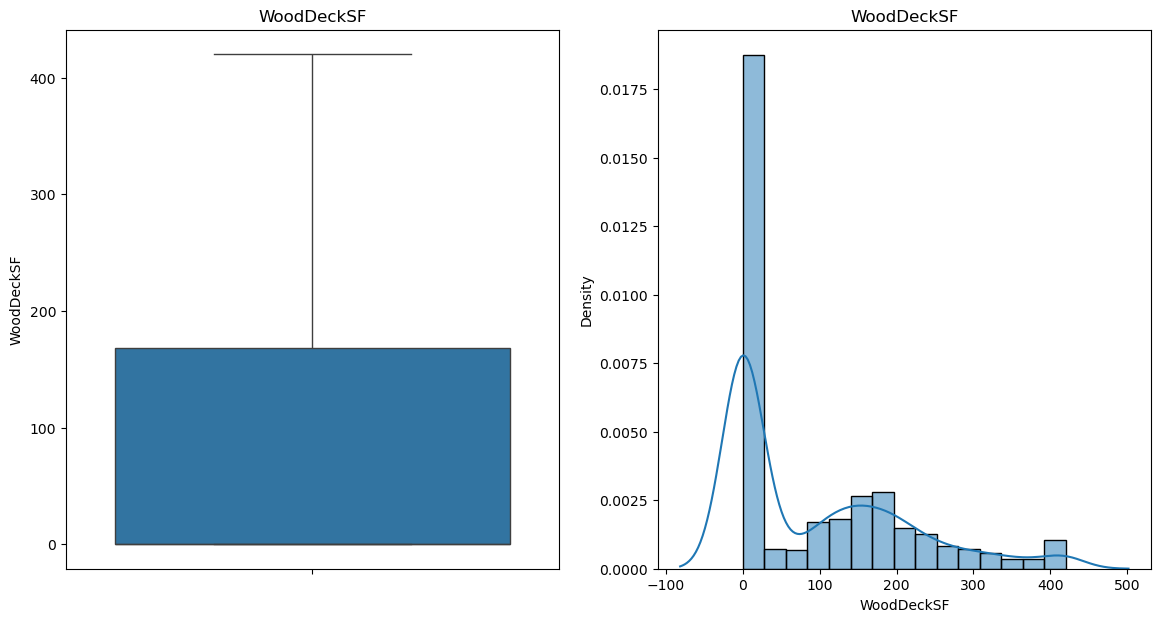

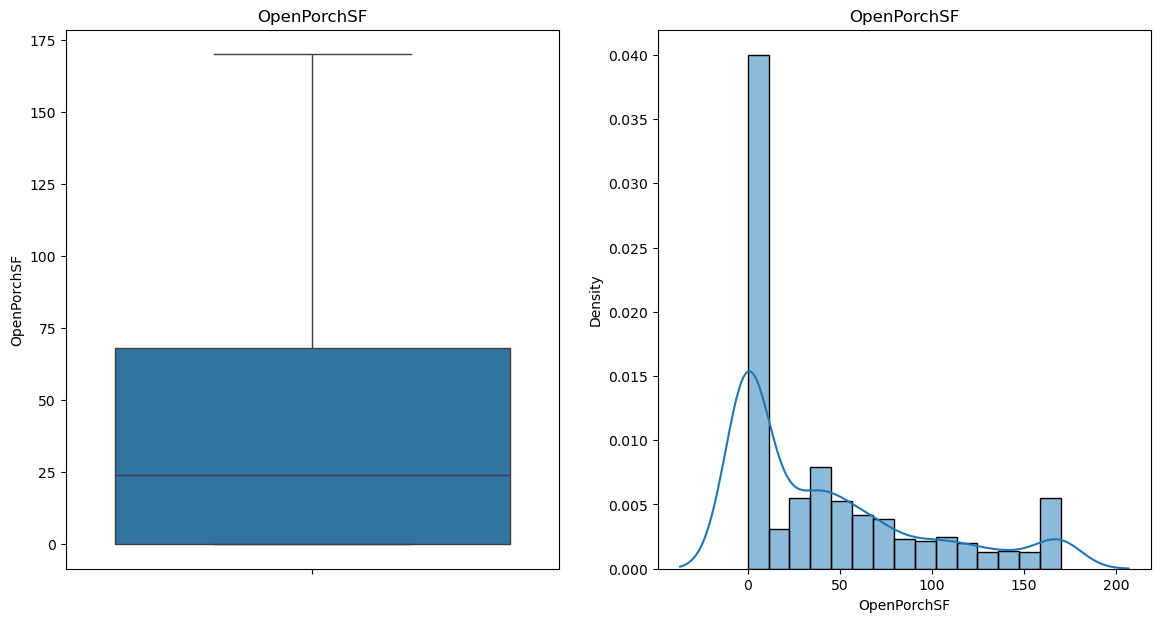

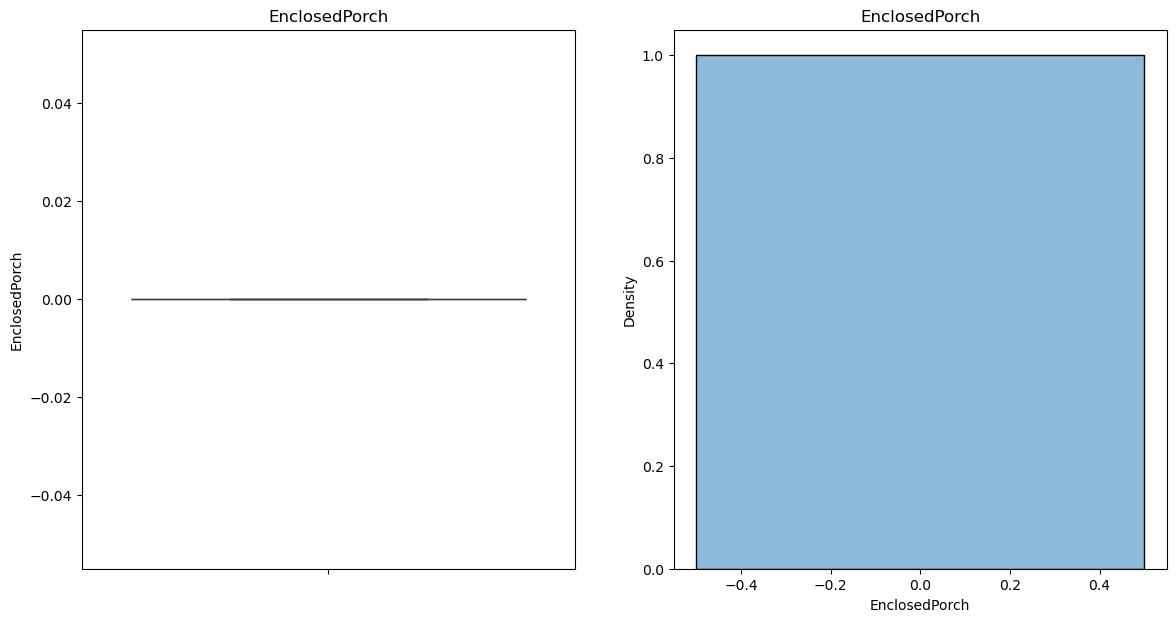

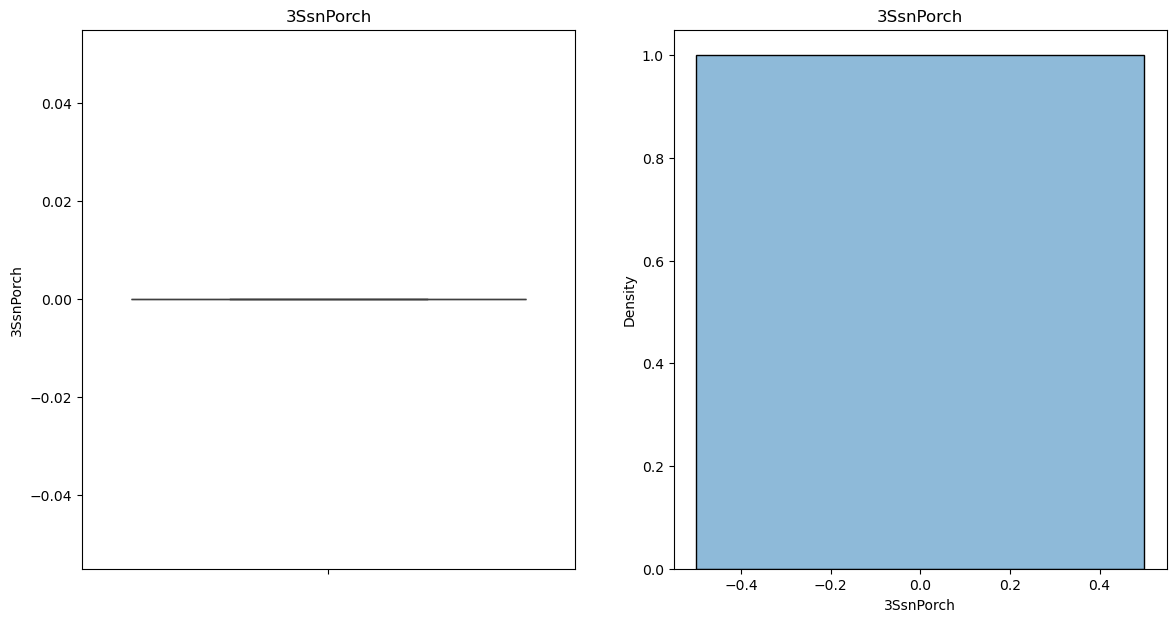

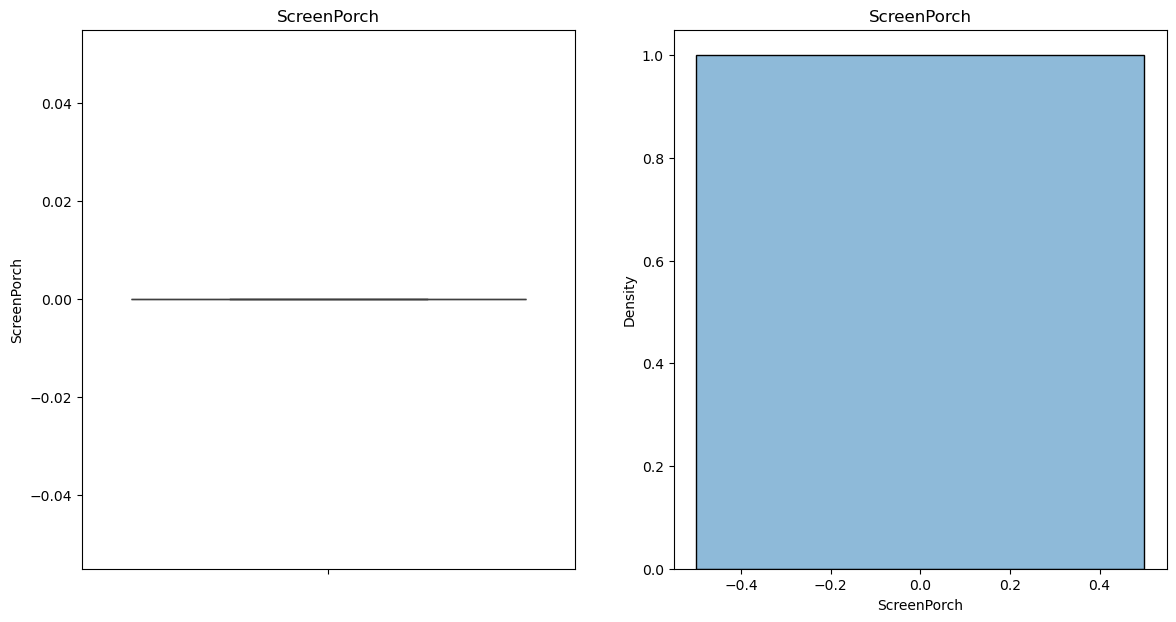

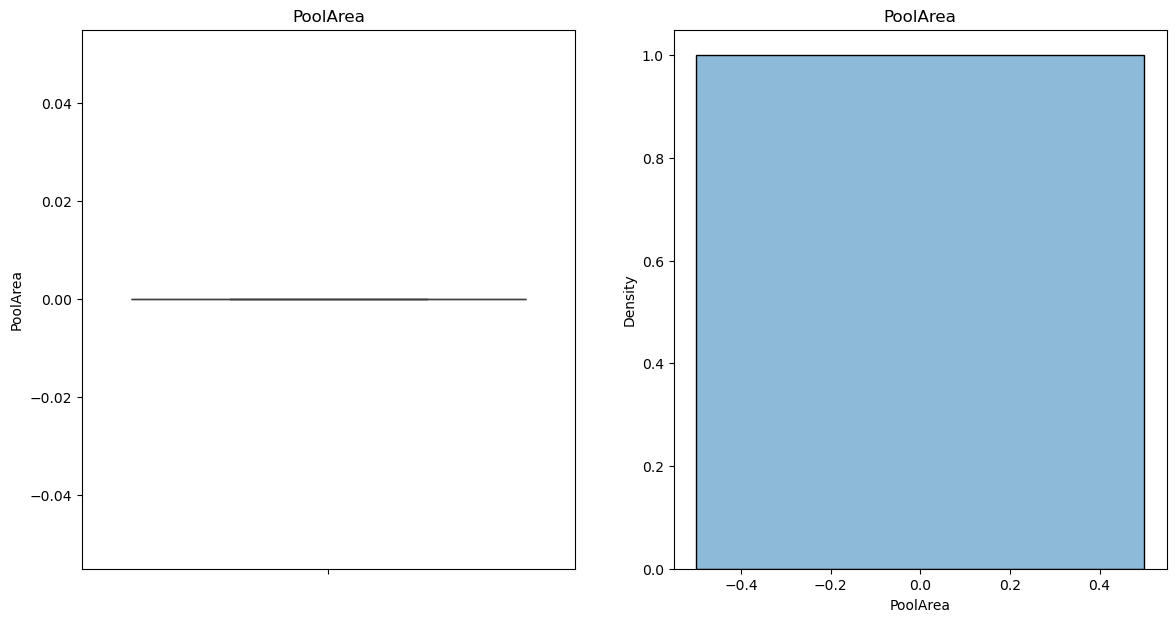

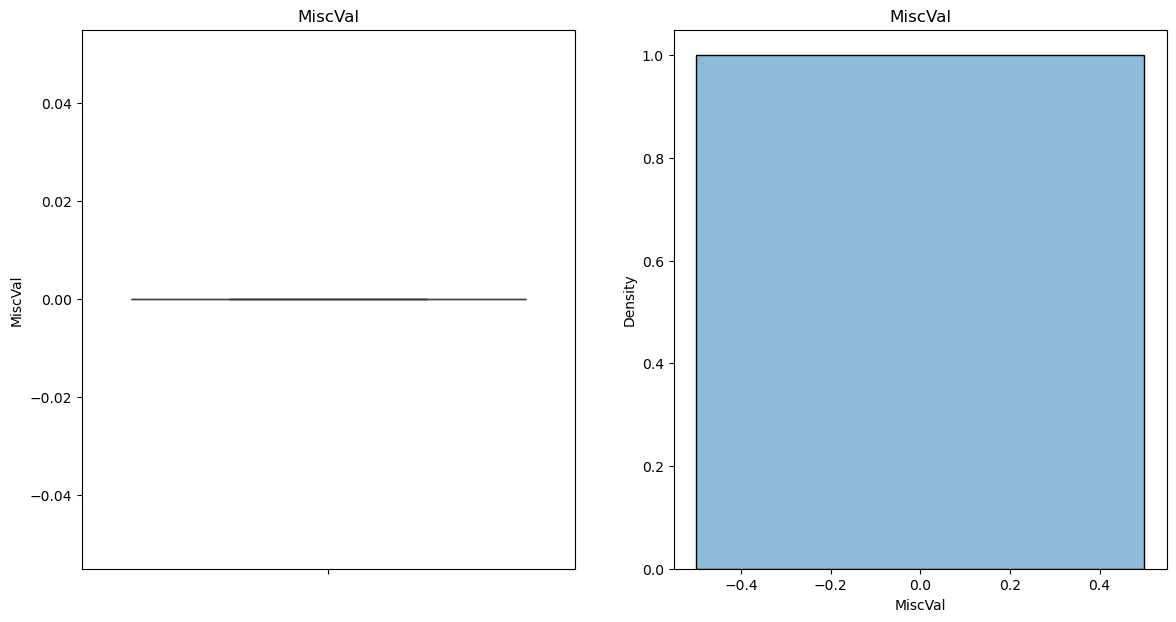

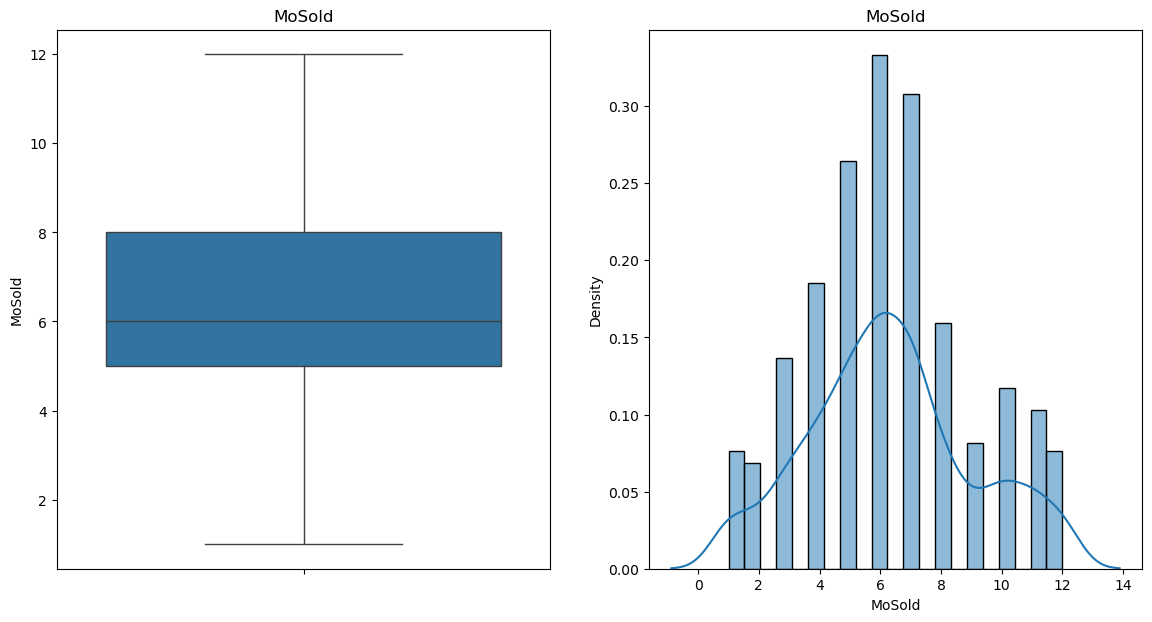

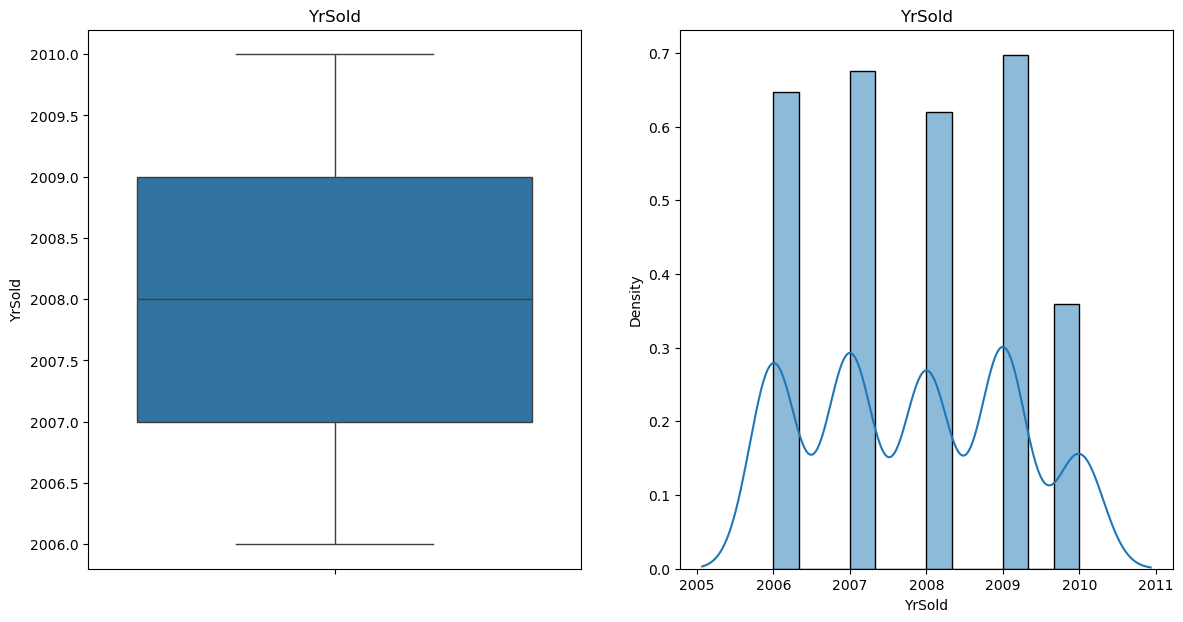

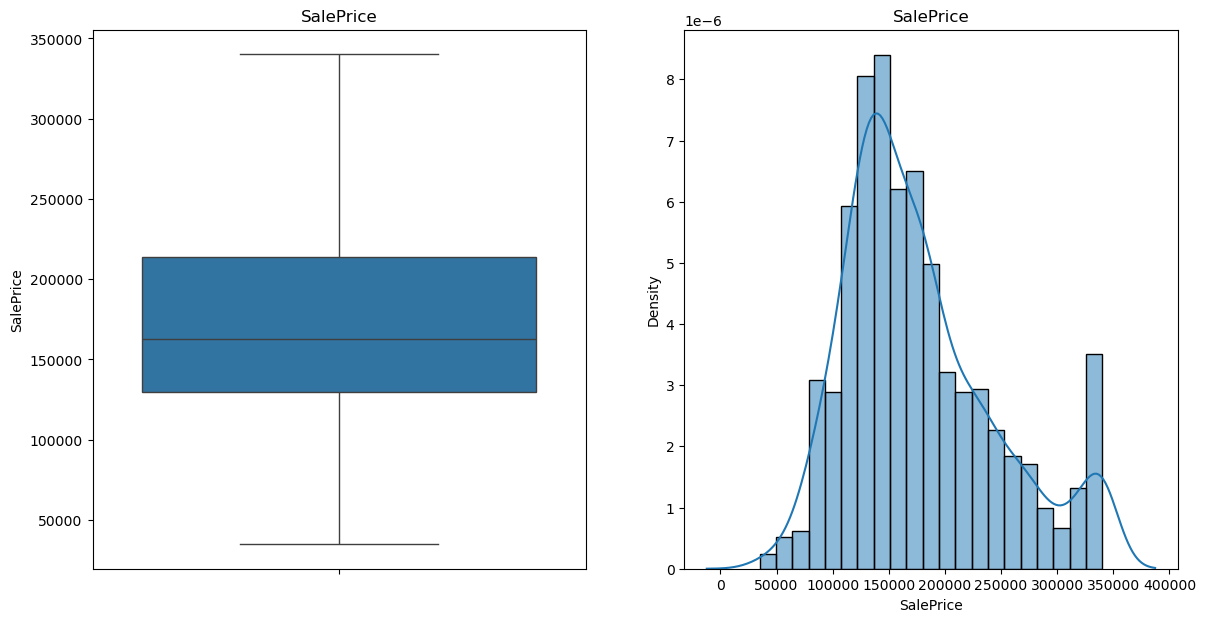

In [103]:
for col in int_feature:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(new_df_cap[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(new_df_cap[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

## Separate numerical and categorical columns

In [104]:
# Separate numerical and categorical columns as DataFrames
numerical_df = df.select_dtypes(include=['number'])  
categorical_df = df.select_dtypes(exclude=['number'])

In [105]:
numerical_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0            0         0        0       2    2008     208500  
1            0         0        0       5    2007     181500  
2            0         0        0       9    2008     223500  
3            0         0        0       2    2006     140000  
4            0         0        0      12    2008     250000

In [106]:
categorical_df.head()

MSZoning Street    Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  NoAlley      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  NoAlley      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  NoAlley      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  NoAlley      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  NoAlley      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd     NoType        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng     NoType        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ          NO     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y     NO    NO          NO   
1          RFn         TA         TA          Y     NO    NO          NO   
2          RFn         TA         TA          Y     NO    NO          NO   
3          Unf         TA         TA          Y     NO    NO          NO   
4          RFn         TA         TA          Y     NO    NO          NO   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [107]:
numerical_df.shape

(1451, 37)

In [108]:
categorical_df.shape

(1451, 43)

In [109]:
df.shape

(1451, 80)

## Convert Categorical data to Numerical Data

In [110]:
# Using OneHot Encoding
encoded_categorical_df = pd.get_dummies(categorical_df, drop_first=True)
encoded_categorical_df.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0        False        False         True        False         True   
1        False        False         True        False         True   
2        False        False         True        False         True   
3        False        False         True        False         True   
4        False        False         True        False         True   

   Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           True       False         False         False          True   
1           True       False         False         False          True   
2           True       False         False         False         False   
3           True       False         False         False         False   
4           True       False         False         False         False   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0            False            False             True             False   
1            False            False             True             False   
2            False            False             True             False   
3            False            False             True             False   
4            False            False             True             False   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0              False          False          False              True   
1              False           True          False             False   
2              False          False          False              True   
3              False          False          False             False   
4              False           True          False             False   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0          False          False                 False                False   
1          False          False                 False                False   
2          False          False                 False                False   
3          False          False                 False                False   
4          False          False                 False                False   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                 False                 False                  True   
1                 False                 False                 False   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                 False   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                  True                 False                 False   
4                 False                 False                 False   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                False                 False                 False   
1                False                 False                 False   
2                False                 False                 False   
3                False                 False                 False   
4                False                 False                 False   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0               False                 False                False   
1               False                 False                False   
2               False                 False                False   
3               False                 False                False   
4               False                 False                False   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                 False            

In [111]:
encoded_categorical_df.shape

(1451, 223)

In [112]:
# Concatenate back
final_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)
final_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  \
0            0         0        0       2    2008     208500        False   
1            0         0        0       5    2007     181500        False   
2            0         0        0       9    2008     223500        False   
3            0         0        0       2    2006     140000        False   
4            0         0        0      12    2008     250000        False   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NoAlley  \
0        False         True        False         True           True   
1        False         True        False         True           True   
2        False         True        False         True           True   
3        False         True        False         True           True   
4        False         True        False         True           True   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0       False         False         False          True            False   
1       False         False         False          True            False   
2       False         False         False         False            False   
3       False         False         False         False            False   
4       False         False         False         False            False   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0            False             True             False              False   
1            False             True             False              False   
2            False             True      

In [113]:
final_df.shape

(1451, 260)

In [114]:
final_df.drop(columns=['Id'],inplace=True)

In [115]:
final_df.shape

(1451, 259)

In [116]:
final_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  \
0            0         0        0       2    2008     208500        False   
1            0         0        0       5    2007     181500        False   
2            0         0        0       9    2008     223500        False   
3            0         0        0       2    2006     140000        False   
4            0         0        0      12    2008     250000        False   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NoAlley  \
0        False         True        False         True           True   
1        False         True        False         True           True   
2        False         True        False         True           True   
3        False         True        False         True           True   
4        False         True        False         True           True   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0       False         False         False          True            False   
1       False         False         False          True            False   
2       False         False         False         False            False   
3       False         False         False         False            False   
4       False         False         False         False            False   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0            False             True             False              False   
1            False             True             False              False   
2            False             True             False            

## Define Feature and Target variable

In [117]:
X = final_df.drop(columns=['SalePrice'])  
y = final_df['SalePrice']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X_train.shape

(1160, 258)

In [120]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1295          20         70.0     8400            5            5       1968   
1041          60         60.0     9130            6            8       1966   
417           70         86.0    22420            6            6       1918   
1172         160         35.0     4017            7            5       2006   
86            60        122.0    11911            6            5       2005   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1295          1968       168.0        1016           0         36   
1041          2000       252.0         400          64        336   
417           1950         0.0        1128           0        242   
1172          2007         0.0           0           0        625   
86            2005         0.0           0           0        684   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1295         1052      1052         0             0       1052             1   
1041          800       800       832             0       1632             0   
417          1370      1370      1254             0       2624             1   
1172          625       625       625             0       1250             0   
86            684       684       876             0       1560             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1295             0         1         1             3             1   
1041             1         1         1             4             1   
417              0         2         1             4             1   
1172             0         2         1             2             1   
86               0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1295             5           0           1         288         356   
1041             7           0           2         484           0   
417             10           1           3         864           0   
1172             5           0           2         625           0   
86               6           1           2         400         100   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1295            0              0          0            0         0        0   
1041           40              0          0            0         0        0   
417             0              0          0            0         0        0   
1172           54              0          0            0         0        0   
86             38              0          0            0         0        0   

      MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
1295      11    2006        False        False         True        False   
1041       7    2008        False        False         True        False   
417       11    2007        False        False         True        False   
1172       3    2008         True        False        False        False   
86         3    2009        False        False         True        False   

      Street_Pave  Alley_NoAlley  Alley_Pave  LotShape_IR2  LotShape_IR3  \
1295         True           True       False         False         False   
1041         True           True       False         False         False   
417          True           True       False         False         False   
1172         True          False        True         False         False   
86           True           True       False          True         False   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
1295          True            False            False             True   
1041          True            False            False             True   
417          False            False            False             True   
1172         False            False            False             True   
86           False            False    

## Model Fitting

In [121]:
from sklearn.linear_model import Ridge

# Alpha controls penalty strength
model = Ridge(alpha=1.0) 
# Train the model
model.fit(X_train, y_train)
# Predictions on training set
y_train_pred = model.predict(X_train)
# Predictions on test set
y_test_pred = model.predict(X_test)    

In [122]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training R2 Score:", train_r2)
print("Test R2 Score:", test_r2)

Training R2 Score: 0.9147817605529099
Test R2 Score: 0.882013629183147


In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Mean R2 Score from Cross-validation:", cv_scores.mean())

Mean R2 Score from Cross-validation: 0.8247310887717665
